# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import dash
from dash import html, dcc
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

# Reading the Dataset in a Dataframe

In [4]:
# Load merged data (example)
movies = pd.read_csv("movies_utf8.csv")
ratings = pd.read_csv("rating_utf8.csv")
tags = pd.read_csv("tags_utf8.csv")

In [5]:
movies.head()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy

In [6]:
ratings.head()

userId  movieId  rating   timestamp
0   12882        1     4.0  1147195252
1   12882       32     3.5  1147195307
2   12882       47     5.0  1147195343
3   12882       50     5.0  1147185499
4   12882      110     4.5  1147195239

In [7]:
tags.head()

movieId  userId           tag   timestamp
0     3916   12882        sports  1147195545
1     4085   12882  Eddie Murphy  1147195966
2    33660   12882        boxing  1147195514
3     1197     320     must show  1145964801
4     1396     320     must show  1145964810

# Merge 1: Combine movie dataset with ratings

In [9]:
movies_ratings = pd.merge(
    left=movies,
    right=ratings,
    on="movieId",
    how="inner"
)
movies_ratings

movieId                           title  \
0             1                Toy Story (1995)   
1             1                Toy Story (1995)   
2             1                Toy Story (1995)   
3             1                Toy Story (1995)   
4             1                Toy Story (1995)   
...         ...                             ...   
264500   112852  Guardians of the Galaxy (2014)   
264501   112852  Guardians of the Galaxy (2014)   
264502   112852  Guardians of the Galaxy (2014)   
264503   112852  Guardians of the Galaxy (2014)   
264504   112852  Guardians of the Galaxy (2014)   

                                             genres  userId  rating  \
0       Adventure|Animation|Children|Comedy|Fantasy   12882     4.0   
1       Adventure|Animation|Children|Comedy|Fantasy  121987     4.5   
2       Adventure|Animation|Children|Comedy|Fantasy   18127     4.0   
3       Adventure|Animation|Children|Comedy|Fantasy   17318     4.0   
4       Adventure|Animation|Children|Comedy|Fantasy   69519     4.0   
...                                             ...     ...     ...   
264500                      Action|Adventure|Sci-Fi   26867     2.5   
264501                      Action|Adventure|Sci-Fi   86768     4.0   
264502                      Action|Adventure|Sci-Fi   39214     4.0   
264503                      Action|Adventure|Sci-Fi  102118     4.0   
264504                      Action|Adventure|Sci-Fi  134156     5.0   

         timestamp  
0       1147195252  
1       1308152264  
2       1130946329  
3       1168807334  
4       1303980621  
...            ...  
264500  1418789842  
264501  1426475869  
264502  1416110586  
264503  1416756118  
264504  1420364734  

[264505 rows x 6 columns]

### Renaming the timestamp

In [11]:
movies_ratings.rename(columns={"timestamp": "rating_timestamp"}, inplace=True)


In [12]:
movies_ratings.head()

movieId             title                                       genres  \
0        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
1        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
2        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
3        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
4        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   

   userId  rating  rating_timestamp  
0   12882     4.0        1147195252  
1  121987     4.5        1308152264  
2   18127     4.0        1130946329  
3   17318     4.0        1168807334  
4   69519     4.0        1303980621

### Merge 2: Add tag information for the same movie and user

In [14]:
movie_rating_tags_df = pd.merge(
    left=movies_ratings,
    right=tags,
    on=["movieId", "userId"],
    how="inner"
)
movie_rating_tags_df

movieId                           title  \
0            1                Toy Story (1995)   
1            1                Toy Story (1995)   
2            1                Toy Story (1995)   
3            1                Toy Story (1995)   
4            1                Toy Story (1995)   
...        ...                             ...   
81807   112852  Guardians of the Galaxy (2014)   
81808   112852  Guardians of the Galaxy (2014)   
81809   112852  Guardians of the Galaxy (2014)   
81810   112852  Guardians of the Galaxy (2014)   
81811   112852  Guardians of the Galaxy (2014)   

                                            genres  userId  rating  \
0      Adventure|Animation|Children|Comedy|Fantasy  108922     0.5   
1      Adventure|Animation|Children|Comedy|Fantasy  108922     0.5   
2      Adventure|Animation|Children|Comedy|Fantasy  108922     0.5   
3      Adventure|Animation|Children|Comedy|Fantasy  108922     0.5   
4      Adventure|Animation|Children|Comedy|Fantasy  108922     0.5   
...                                            ...     ...     ...   
81807                      Action|Adventure|Sci-Fi   88738     4.0   
81808                      Action|Adventure|Sci-Fi   88738     4.0   
81809                      Action|Adventure|Sci-Fi   88738     4.0   
81810                      Action|Adventure|Sci-Fi   88738     4.0   
81811                      Action|Adventure|Sci-Fi  102118     4.0   

       rating_timestamp                 tag   timestamp  
0            1284588846            children  1284588869  
1            1284588846  computer animation  1284588868  
2            1284588846              Disney  1284588860  
3            1284588846              family  1284588873  
4            1284588846               Pixar  1284588865  
...                 ...                 ...         ...  
81807        1416086278              Marvel  1416086401  
81808        1416086278               space  1416086288  
81809        1416086278     talking animals  1416086285  
81810        1416086278   watch the credits  1416086391  
81811        1416756118              sci-fi  1416756130  

[81812 rows x 8 columns]

### Renaming the columns timestamp

In [16]:
movie_rating_tags_df.rename(columns={"timestamp": "tag_timestamp"}, inplace=True)


In [17]:
movie_rating_tags_df

movieId                           title  \
0            1                Toy Story (1995)   
1            1                Toy Story (1995)   
2            1                Toy Story (1995)   
3            1                Toy Story (1995)   
4            1                Toy Story (1995)   
...        ...                             ...   
81807   112852  Guardians of the Galaxy (2014)   
81808   112852  Guardians of the Galaxy (2014)   
81809   112852  Guardians of the Galaxy (2014)   
81810   112852  Guardians of the Galaxy (2014)   
81811   112852  Guardians of the Galaxy (2014)   

                                            genres  userId  rating  \
0      Adventure|Animation|Children|Comedy|Fantasy  108922     0.5   
1      Adventure|Animation|Children|Comedy|Fantasy  108922     0.5   
2      Adventure|Animation|Children|Comedy|Fantasy  108922     0.5   
3      Adventure|Animation|Children|Comedy|Fantasy  108922     0.5   
4      Adventure|Animation|Children|Comedy|Fantasy  108922     0.5   
...                                            ...     ...     ...   
81807                      Action|Adventure|Sci-Fi   88738     4.0   
81808                      Action|Adventure|Sci-Fi   88738     4.0   
81809                      Action|Adventure|Sci-Fi   88738     4.0   
81810                      Action|Adventure|Sci-Fi   88738     4.0   
81811                      Action|Adventure|Sci-Fi  102118     4.0   

       rating_timestamp                 tag  tag_timestamp  
0            1284588846            children     1284588869  
1            1284588846  computer animation     1284588868  
2            1284588846              Disney     1284588860  
3            1284588846              family     1284588873  
4            1284588846               Pixar     1284588865  
...                 ...                 ...            ...  
81807        1416086278              Marvel     1416086401  
81808        1416086278               space     1416086288  
81809        1416086278     talking animals     1416086285  
81810        1416086278   watch the credits     1416086391  
81811        1416756118              sci-fi     1416756130  

[81812 rows x 8 columns]

## Descriptive statistics

In [19]:
movie_rating_tags_df.describe(include="all")

movieId                title genres         userId  \
count    81812.000000                81812  81812   81812.000000   
unique            NaN                 2453    509            NaN   
top               NaN  Pulp Fiction (1994)  Drama            NaN   
freq              NaN                  503   4759            NaN   
mean     18486.150662                  NaN    NaN   69357.338679   
std      27826.689490                  NaN    NaN   42336.813806   
min          1.000000                  NaN    NaN     316.000000   
25%       1300.000000                  NaN    NaN   27898.000000   
50%       3624.000000                  NaN    NaN   68558.000000   
75%      32587.000000                  NaN    NaN  108442.000000   
max     112852.000000                  NaN    NaN  138200.000000   

              rating  rating_timestamp          tag  tag_timestamp  
count   81812.000000      8.181200e+04        81812   8.181200e+04  
unique           NaN               NaN        12286            NaN  
top              NaN               NaN  atmospheric            NaN  
freq             NaN               NaN          589            NaN  
mean        3.708912      1.251025e+09          NaN   1.275693e+09  
std         1.051274      1.110134e+08          NaN   7.842651e+07  
min         0.500000      8.768953e+08          NaN   1.136772e+09  
25%         3.000000      1.184772e+09          NaN   1.217731e+09  
50%         4.000000      1.267616e+09          NaN   1.278599e+09  
75%         4.500000      1.334419e+09          NaN   1.334605e+09  
max         5.000000      1.427740e+09          NaN   1.427746e+09

### Descriptive Statistics
The merged dataset contains 81,812 rows. This indicates a substantial volume of user-movie interactions.

1. Missing values:
No missing values are present in the dataset. This confirms that the dataset is clean and does not require imputation or removal of records, making it suitable for direct use in visualization and modeling.

2. movieId:
The movieId is currently stored as an integer, but it should ideally be treated as a unique identifier rather than a numeric value. This distinction is important to prevent incorrect assumptions (e.g., ordering or numeric operations) during analysis or visualizations.

3. title:
There are 2,453 unique movie titles in the dataset. The movie "Pulp Fiction (1994)" is the most frequently rated, appearing 503 times. This repetition indicates high user engagement with certain films, and these high-frequency titles can be valuable in highlighting trends or creating “Top Rated” sections in the dashboard.

4. genres:
A total of 509 unique genre combinations exist. This high number is due to multiple genres being stored as a pipe-separated string (e.g., "Action|Thriller|Drama"), and each unique combination being counted as a distinct genre. To resolve this, genres should be split and separated, and one-hot encoding should be applied for genre-based filtering and analysis in the dashboard.

5. userId:
This is stored as an integer, but it is actually a categorical identifier for users. Like movieId, it should not be used as a continuous variable, and must be treated accordingly during visualization or filtering tasks.

6. rating:
Mean rating: 3.7089, Minimum rating: 0.5, Maximum rating: 5.0.  The mean and median (50%) values are close to each other, suggesting a generally symmetrical distribution of ratings. However, the presence of extremely low ratings (0.5) has slightly pulled the mean to the left, indicating a mild left skew in the rating distribution. This supports the use of both rating count and average rating depending on the purpose of the chart. For simplicity and clarity in a user-facing dashboard, rating count may be more intuitive for casual users.

7. timestamp:
The timestamp column is currently stored in Unix format and needs to be converted to datetime. This allows for the extraction of year, month, or weekday, which can then be used for time-series analysis and dropdown filters in the dashboard. This step also supports identifying seasonal patterns in user ratings.

8. tag:
There are 12,286 unique tag values. Some tags recur across many users. For instance, the tag "atmospheric" is used 589 times, suggesting it is a common descriptor. Tags can be used for semantic analysis, and possibly in word clouds or tag frequency charts to enrich the dashboard experience.



### Changing the timestamp to datatime format
The timestamp column in the dataset is stored in Unix format, which represents the number of seconds elapsed since January 1, 1970, 00:00:00 UTC (the Unix epoch). These are typically large integers, such as 1147195252.

In order to perform time-based analysis, such as extracting the year, month, or day of the week, this Unix timestamp needs to be converted into a human-readable datetime format.

In [22]:
movie_rating_tags_df['rating_timestamp'] = pd.to_datetime(movie_rating_tags_df['rating_timestamp'], unit='s')
movie_rating_tags_df['tag_timestamp'] = pd.to_datetime(movie_rating_tags_df['tag_timestamp'], unit='s')
movie_rating_tags_df

movieId                           title  \
0            1                Toy Story (1995)   
1            1                Toy Story (1995)   
2            1                Toy Story (1995)   
3            1                Toy Story (1995)   
4            1                Toy Story (1995)   
...        ...                             ...   
81807   112852  Guardians of the Galaxy (2014)   
81808   112852  Guardians of the Galaxy (2014)   
81809   112852  Guardians of the Galaxy (2014)   
81810   112852  Guardians of the Galaxy (2014)   
81811   112852  Guardians of the Galaxy (2014)   

                                            genres  userId  rating  \
0      Adventure|Animation|Children|Comedy|Fantasy  108922     0.5   
1      Adventure|Animation|Children|Comedy|Fantasy  108922     0.5   
2      Adventure|Animation|Children|Comedy|Fantasy  108922     0.5   
3      Adventure|Animation|Children|Comedy|Fantasy  108922     0.5   
4      Adventure|Animation|Children|Comedy|Fantasy  108922     0.5   
...                                            ...     ...     ...   
81807                      Action|Adventure|Sci-Fi   88738     4.0   
81808                      Action|Adventure|Sci-Fi   88738     4.0   
81809                      Action|Adventure|Sci-Fi   88738     4.0   
81810                      Action|Adventure|Sci-Fi   88738     4.0   
81811                      Action|Adventure|Sci-Fi  102118     4.0   

         rating_timestamp                 tag       tag_timestamp  
0     2010-09-15 22:14:06            children 2010-09-15 22:14:29  
1     2010-09-15 22:14:06  computer animation 2010-09-15 22:14:28  
2     2010-09-15 22:14:06              Disney 2010-09-15 22:14:20  
3     2010-09-15 22:14:06              family 2010-09-15 22:14:33  
4     2010-09-15 22:14:06               Pixar 2010-09-15 22:14:25  
...                   ...                 ...                 ...  
81807 2014-11-15 21:17:58              Marvel 2014-11-15 21:20:01  
81808 2014-11-15 21:17:58               space 2014-11-15 21:18:08  
81809 2014-11-15 21:17:58     talking animals 2014-11-15 21:18:05  
81810 2014-11-15 21:17:58   watch the credits 2014-11-15 21:19:51  
81811 2014-11-23 15:21:58              sci-fi 2014-11-23 15:22:10  

[81812 rows x 8 columns]

#### Checking the datatype

In [24]:
movie_rating_tags_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81812 entries, 0 to 81811
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   movieId           81812 non-null  int64         
 1   title             81812 non-null  object        
 2   genres            81812 non-null  object        
 3   userId            81812 non-null  int64         
 4   rating            81812 non-null  float64       
 5   rating_timestamp  81812 non-null  datetime64[ns]
 6   tag               81812 non-null  object        
 7   tag_timestamp     81812 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(2), object(3)
memory usage: 5.0+ MB


### Checking for duplicates

In [26]:
movie_rating_tags_df.duplicated().sum()

0

### Checking for null values

In [28]:
movie_rating_tags_df.isnull().sum()

movieId             0
title               0
genres              0
userId              0
rating              0
rating_timestamp    0
tag                 0
tag_timestamp       0
dtype: int64

### Finding the unique values in the Genre of the movies dataset


In [30]:
unique_genres = set(g for genre_list in movie_rating_tags_df["genres"].str.split('|') for g in genre_list)
print(unique_genres)

{'Horror', 'Western', 'Fantasy', 'Adventure', 'Thriller', 'Crime', 'Romance', 'Comedy', 'Musical', 'Documentary', 'Sci-Fi', 'Animation', 'Film-Noir', 'Action', 'IMAX', 'Children', 'War', 'Mystery', 'Drama'}


### Extracting the year from the title: using regular expressions 
Extracting the year from the movie title using regular expressions allows to isolate the release year of each movie and to use it as a separate feature for temporal analysis. By setting the year as an index, grouping and analyzing movies by year (e.g., trends in genre popularity, average ratings over time) enables time-series visualizations in dashboards. This helps to prepare the data for machine learning models and supports better storytelling in interactive dashboards.

In [32]:
movie_rating_tags_df['year'] = movie_rating_tags_df['title'].str.extract(r'\((\d{4})\)')  # (This extracts 4-digit year in parentheses)
movie_rating_tags_df['title'] = movie_rating_tags_df['title'].str.replace(r'\(\d{4}\)', '', regex=True).str.strip()

In [33]:
movie_rating_tags_df

movieId                    title  \
0            1                Toy Story   
1            1                Toy Story   
2            1                Toy Story   
3            1                Toy Story   
4            1                Toy Story   
...        ...                      ...   
81807   112852  Guardians of the Galaxy   
81808   112852  Guardians of the Galaxy   
81809   112852  Guardians of the Galaxy   
81810   112852  Guardians of the Galaxy   
81811   112852  Guardians of the Galaxy   

                                            genres  userId  rating  \
0      Adventure|Animation|Children|Comedy|Fantasy  108922     0.5   
1      Adventure|Animation|Children|Comedy|Fantasy  108922     0.5   
2      Adventure|Animation|Children|Comedy|Fantasy  108922     0.5   
3      Adventure|Animation|Children|Comedy|Fantasy  108922     0.5   
4      Adventure|Animation|Children|Comedy|Fantasy  108922     0.5   
...                                            ...     ...     ...   
81807                      Action|Adventure|Sci-Fi   88738     4.0   
81808                      Action|Adventure|Sci-Fi   88738     4.0   
81809                      Action|Adventure|Sci-Fi   88738     4.0   
81810                      Action|Adventure|Sci-Fi   88738     4.0   
81811                      Action|Adventure|Sci-Fi  102118     4.0   

         rating_timestamp                 tag       tag_timestamp  year  
0     2010-09-15 22:14:06            children 2010-09-15 22:14:29  1995  
1     2010-09-15 22:14:06  computer animation 2010-09-15 22:14:28  1995  
2     2010-09-15 22:14:06              Disney 2010-09-15 22:14:20  1995  
3     2010-09-15 22:14:06              family 2010-09-15 22:14:33  1995  
4     2010-09-15 22:14:06               Pixar 2010-09-15 22:14:25  1995  
...                   ...                 ...                 ...   ...  
81807 2014-11-15 21:17:58              Marvel 2014-11-15 21:20:01  2014  
81808 2014-11-15 21:17:58               space 2014-11-15 21:18:08  2014  
81809 2014-11-15 21:17:58     talking animals 2014-11-15 21:18:05  2014  
81810 2014-11-15 21:17:58   watch the credits 2014-11-15 21:19:51  2014  
81811 2014-11-23 15:21:58              sci-fi 2014-11-23 15:22:10  2014  

[81812 rows x 9 columns]

#### Finding the min and the max year in the year column:

In [35]:
print(movie_rating_tags_df["year"].astype("int").min(), movie_rating_tags_df["year"].astype("int").max())

1922 2014


In [36]:
movie_rating_tags_df[movie_rating_tags_df["year"] == "1922"]

movieId                                              title  genres  \
21043     1348  Nosferatu (Nosferatu, eine Symphonie des Grauens)  Horror   
21044     1348  Nosferatu (Nosferatu, eine Symphonie des Grauens)  Horror   
21045     1348  Nosferatu (Nosferatu, eine Symphonie des Grauens)  Horror   
21046     1348  Nosferatu (Nosferatu, eine Symphonie des Grauens)  Horror   
21047     1348  Nosferatu (Nosferatu, eine Symphonie des Grauens)  Horror   
21048     1348  Nosferatu (Nosferatu, eine Symphonie des Grauens)  Horror   
21049     1348  Nosferatu (Nosferatu, eine Symphonie des Grauens)  Horror   
21050     1348  Nosferatu (Nosferatu, eine Symphonie des Grauens)  Horror   
21051     1348  Nosferatu (Nosferatu, eine Symphonie des Grauens)  Horror   
21052     1348  Nosferatu (Nosferatu, eine Symphonie des Grauens)  Horror   
21053     1348  Nosferatu (Nosferatu, eine Symphonie des Grauens)  Horror   
21054     1348  Nosferatu (Nosferatu, eine Symphonie des Grauens)  Horror   
21055     1348  Nosferatu (Nosferatu, eine Symphonie des Grauens)  Horror   
21056     1348  Nosferatu (Nosferatu, eine Symphonie des Grauens)  Horror   
21057     1348  Nosferatu (Nosferatu, eine Symphonie des Grauens)  Horror   
21058     1348  Nosferatu (Nosferatu, eine Symphonie des Grauens)  Horror   
21059     1348  Nosferatu (Nosferatu, eine Symphonie des Grauens)  Horror   
21060     1348  Nosferatu (Nosferatu, eine Symphonie des Grauens)  Horror   

       userId  rating    rating_timestamp                   tag  \
21043  124998     2.5 2013-10-11 05:55:30  German Expressionism   
21044  124998     2.5 2013-10-11 05:55:30                gothic   
21045  124998     2.5 2013-10-11 05:55:30          silent movie   
21046  124998     2.5 2013-10-11 05:55:30              vampires   
21047   96370     2.5 2003-05-15 18:02:37              vampires   
21048   47866     4.0 2010-07-15 22:26:18               classic   
21049   47866     4.0 2010-07-15 22:26:18           F.W. Murnau   
21050   47866     4.0 2010-07-15 22:26:18  german expressionism   
21051  130827     2.5 2010-06-23 12:25:04          google video   
21052  130827     2.5 2010-06-23 12:25:04           library vhs   
21053   26867     5.0 2003-11-02 01:52:47  german expressionism   
21054   15324     2.0 2009-08-30 01:05:22          imdb top 250   
21055   15324     2.0 2009-08-30 01:05:22              vampires   
21056   52762     2.5 2012-02-17 05:32:28           atmospheric   
21057   52762     2.5 2012-02-17 05:32:28  german expressionism   
21058  123297     5.0 2004-03-30 19:10:19                  BD-R   
21059  123297     5.0 2004-03-30 19:10:19             DVD-Video   
21060   70201     3.0 2010-06-30 03:59:08           F.W. Murnau   

            tag_timestamp  year  
21043 2014-03-16 02:58:55  1922  
21044 2011-09-13 19:32:26  1922  
21045 2013-09-16 02:42:56  1922  
21046 2013-09-16 02:43:03  1922  
21047 2006-01-16 01:29:32  1922  
21048 2010-07-15 22:26:27  1922  
21049 2010-07-15 22:26:29  1922  
21050 2010-07-15 22:26:23  1922  
21051 2008-07-26 15:55:26  1922  
21052 2007-11-04 23:58:05  1922  
21053 2006-02-20 02:19:51  1922  
21054 2010-07-01 15:15:49  1922  
21055 2009-08-30 10:51:02  1922  
21056 2012-02-17 05:32:40  1922  
21057 2012-02-17 05:32:43  1922  
21058 2010-11-11 17:30:17  1922  
21059 2008-03-24 19:17:40  1922  
21060 2009-04-04 20:05:23  1922

In [37]:
movie_rating_tags_df.describe(include="all")

movieId         title genres         userId        rating  \
count    81812.000000         81812  81812   81812.000000  81812.000000   
unique            NaN          2417    509            NaN           NaN   
top               NaN  Pulp Fiction  Drama            NaN           NaN   
freq              NaN           503   4759            NaN           NaN   
mean     18486.150662           NaN    NaN   69357.338679      3.708912   
min          1.000000           NaN    NaN     316.000000      0.500000   
25%       1300.000000           NaN    NaN   27898.000000      3.000000   
50%       3624.000000           NaN    NaN   68558.000000      4.000000   
75%      32587.000000           NaN    NaN  108442.000000      4.500000   
max     112852.000000           NaN    NaN  138200.000000      5.000000   
std      27826.689490           NaN    NaN   42336.813806      1.051274   

                     rating_timestamp          tag  \
count                           81812        81812   
unique                            NaN        12286   
top                               NaN  atmospheric   
freq                              NaN          589   
mean    2009-08-23 11:03:21.853884416          NaN   
min               1997-10-15 06:01:46          NaN   
25%               2007-07-18 15:11:46          NaN   
50%               2010-03-03 11:32:26          NaN   
75%               2012-04-14 16:04:30          NaN   
max               2015-03-30 18:33:54          NaN   
std                               NaN          NaN   

                        tag_timestamp   year  
count                           81812  81812  
unique                            NaN     89  
top                               NaN   2004  
freq                              NaN   4113  
mean    2010-06-04 23:04:18.906419456    NaN  
min               2006-01-09 02:01:59    NaN  
25%        2008-08-03 02:32:49.500000    NaN  
50%        2010-07-08 14:18:02.500000    NaN  
75%     2012-04-16 19:29:21.249999872    NaN  
max               2015-03-30 20:05:34    NaN  
std                               NaN    NaN

### Setting the index as year

In [39]:
movie_rating_tags_df = movie_rating_tags_df.set_index("year")

# Objective:

The primary objective of this project is to design and implement an interactive dashboard for a movie dataset containing various features, including Movie titles and IDs, User IDs and their ratings, Movie genres, Tags provided by users and Timestamps of interactions.

The dashboard is specifically targeted at a young adult audience aged 18–35, with a focus on interactivity, ease of use, and aesthetically pleasing design. It aims to present key insights from the dataset in a way that is engaging, informative, and accessible to an audience interested in exploring movie trends, rating patterns, discover popular movies, and understand genre trends.

### Experimental methods:
Many methods were experimented in determining the features, plots, design and layout of the dashboard and the color for the dashboard through visualisations.

# Experiment 1:

## Data Preprocessing and Feature Engineering

1. Dataset Merging:

The ratings, movies, and tags datasets were merged to form a unified dataset movie_rating_tags_df. This enabled a comprehensive view of the data, facilitating the use of ratings to filter and visualize movie trends over time. The use of tags to explore semantic groupings or to potentially generate a word cloud. This merging was essential for integrating diverse perspectives (quantitative and qualitative) into one cohesive dashboard.

2. Data Cleaning and Validation:

Descriptive statistics were generated. The dataset was checked for and cleaned of null values and duplicates. Clean data ensures the dashboard’s reliability and accuracy. It was especially important to verify data integrity after merging multiple datasets, to confirm that no inconsistencies or corrupt entries could affect visualizations or filtering logic.

3. Timestamp Conversion:

The timestamp field was converted from Unix format to standard Python datetime. This conversion was done to make the rating year and rating month available for use in dropdown filters, with the initial hypothesis that users might explore movie trends by season (e.g., Christmas movies in December). Although later discarded, this idea initially guided the inclusion of temporal elements.

4. Genre Transformation:

The genres column originally listed genres as a string with pipe-separated values (e.g., "Comedy|Romance"). These were split and one-hot encoded. This transformation was necessary to allow genre-level filtering and analysis in the dashboard. Instead of treating genres as a single text value, separating them enabled genre-specific trend visualizations and filtering options.

5. Title Year Extraction:
   
Movie titles included the release year in parentheses (e.g., "The Matrix (1999)"). This year was extracted into a new year column. The year was intended to be used as an alternative dropdown filter in the dashboard. Extracting it also allowed calculation of the start and end year range for time-based trend analysis (using min() and max() functions).

### Initial Design Concepts and Revisions

Initial Design Plan and design: Three dropdown filters : Rating Year, Rating Month, and Genre. The idea was to enable users to explore movies according to seasons, based on the assumption that certain genres or movie types (e.g., Christmas movies) become more prevalent at specific times of year. But the Rating Month filter was removed. The exploratory analysis showed that monthly rating trends fully did not align meaningfully with seasons, and did not provide correct actionable insight. To avoid unnecessary complexity and confusion, the final design retained Year and Genre as the primary filters—offering more valuable information for users.

### Visualization Techniques - Tested
Some of the simple charts that were tested in all the experimental process were the Line Charts, Bar Charts, Box Plots, and Word Clouds. In the final chart selection, the Line Charts and Bar Charts were selected for the use of dashboard due to its simplicity and clarity for an ordinary audience. Box plots and other statistical plots were avoided because they are more complex and might not be easily understood by casual users, who may not wish to engage in deeper statistical analysis. Line charts were used to illustrate trends over time, especially changes in rating count or average rating per year, and genre popularity over years. Bar charts effectively showed categorical comparisons, such as the top movies by rating count or average rating and for listing the new trending movies.

### Metric Choice: 
Initially Rating Count and Average Rating were tested using different graphs, but the final choice in the dashboard was Rating Count rather than average rating. Count is a simpler, more intuitive metric that conveys popularity. For a casual user (the primary audience), knowing how many users rated a movie is often more valuable and straightforward than interpreting averages, which can be affected by outliers or small sample sizes. This aligns with the dashboard’s goal of quickly conveying meaningful insights without overwhelming the user. 

### Dashboard Layout and Interaction Flow
Initial Layout Design and Testing: Dash and Panel were tested. The initial layout of the dashboard featured a title header placed at the top for clear orientation. Two dropdown filters (for Genre and Year) positioned in the center for intuitive access. This structure was deliberately chosen to ensure that users are visually guided from the title to the filter options in a top-down flow. Dropdowns appear central and accessible on both desktop and mobile screens, a key design decision for the 18–35 age group, who are predominantly mobile-first users. Once a user selects a specific genre and year, the dashboard dynamically responds with two key outputs, filtered Movie List, which is a data table displays all movies that match the selected genre and year. This helps users instantly discover relevant movies without scrolling or searching manually. The table serves as a simple recommendation mechanism, encouraging movie exploration based on personal preferences. The second is the trend line plot, which appears below the movie list, showing the trend of rating counts for the selected genre over the years. This allows users to see how popularity has changed over time for that genre, helping them understand if interest in that genre is increasing or declining.

##### Line plots: 
Simple line plots were selected over panels or more complex visualizations, as they provide a clear representation of change over time. Initially, panel displays for specific years were considered; however, these limited the ability to view longitudinal trends and were less informative. The final design ensures that even casual users can quickly understand what's trending, what's not, and which movies align with their interest, without needing any prior data expertise.

##### Bar charts:
Bar Chart was chosen to display the top movies by rating count. This provides a quick, recognizable list of popular movies. A horizontal bar chart accommodated long titles and emphasize readability. Color palettes (e.g., dark themes) were chosen to appeal to younger users and ensure readability.
Visual clutter was avoided to ensure that users could extract key information quickly—aligned with casual browsing behavior.

### Conclusion
Through structured experimentation with data preprocessing, visualization types, user interface design, and interactivity elements, a well-informed and user-focused dashboard was developed. The final dashboard empowers users aged 18–35 to explore movie data intuitively—revealing genre trends, popular movies, and rating behaviors over time.

The emphasis on clarity, simplicity, and relevance ensures that the dashboard not only serves its analytical purpose but also provides an engaging and enjoyable user experience.


# Experiment 1: Feature Engineering and Plot Selection for Dashboard Insights

### Visualisation 1. Average Ratings and Count of Ratings by Year
 
To analyze trends in movie engagement over time, the data was grouped by release year, and two key metrics were calculated: the average rating (using the mean() function) and the count of ratings (using the count() function). Any missing values were dropped to maintain consistency in visualizations. These metrics were then visualized using line plots, which are effective for revealing long-term trends and fluctuations. The average rating plot offers insight into how audience perception of movie quality has evolved, highlighting specific years where movies were rated particularly high or low. Meanwhile, the count of ratings plot captures user engagement, indicating which years saw the most active rating behavior and identifying culturally significant or popular movie eras. These visualizations are especially tailored for the 18–35 age group, who prefer visually intuitive insights. Additionally, this analysis helps uncover data-rich periods, crucial for building effective machine learning models, and sparser years that may require special handling due to limited data.

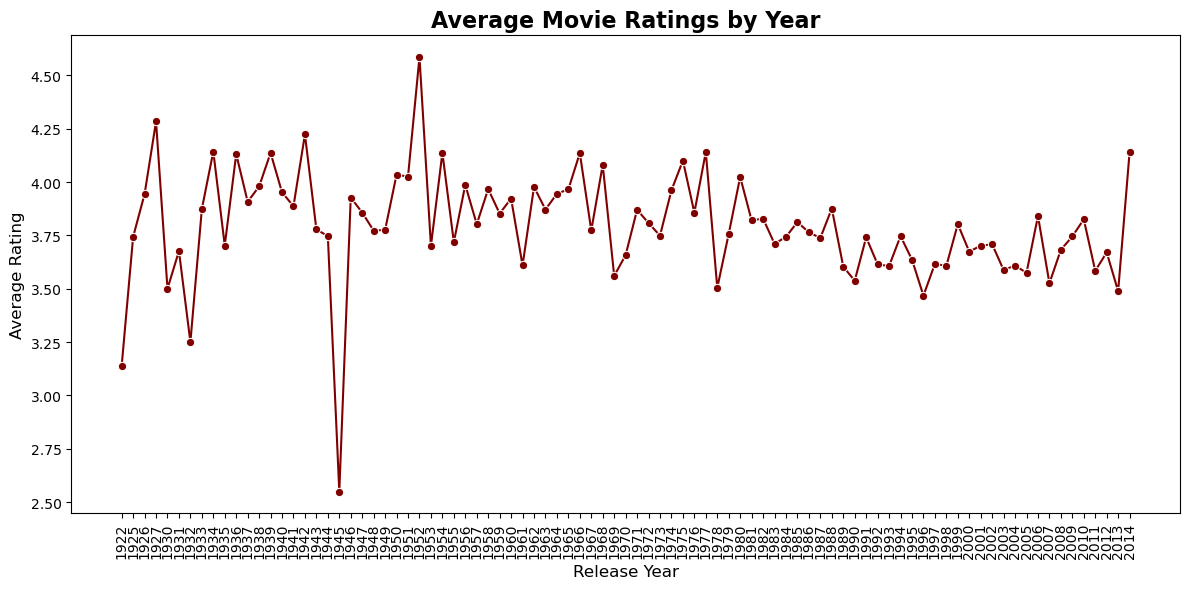

In [44]:
# Group by year to get average ratings
rating_average = movie_rating_tags_df.groupby("year")["rating"].mean().reset_index()
rating_average = rating_average.dropna()

plt.figure(figsize=(12, 6))
sns.lineplot(data=rating_average, x="year", y="rating", marker="o", color="maroon")

plt.title("Average Movie Ratings by Year", fontsize=16, weight="bold")
plt.xlabel("Release Year", fontsize=12)
plt.ylabel("Average Rating", fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


## Using Dash: Average ratings by year

### 2. Count of ratings by year

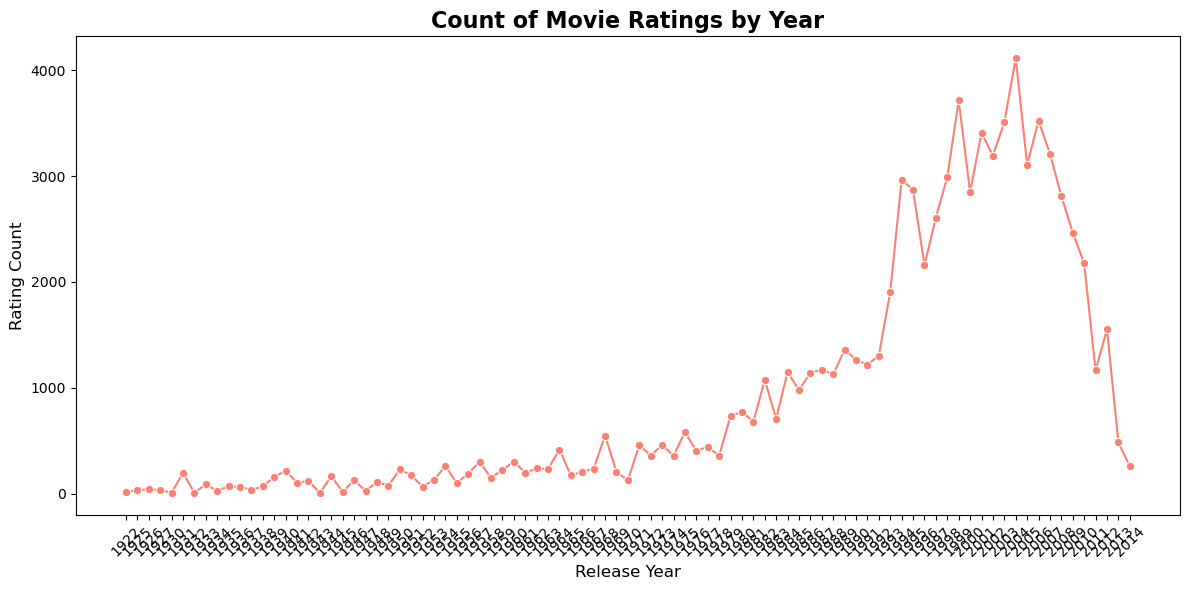

In [47]:
# Sample DataFrame preparation (adjust accordingly)
rating_count = movie_rating_tags_df.groupby("year")["rating"].count().reset_index()
rating_count = rating_count.dropna()


plt.figure(figsize=(12, 6))
sns.lineplot(data=rating_count, x="year", y="rating", marker="o", color="salmon")

plt.title("Count of Movie Ratings by Year", fontsize=16, weight="bold")
plt.xlabel("Release Year", fontsize=12)
plt.ylabel("Rating Count", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Using Dash - Count of Movie ratings by year

### 3. Combining - Average ratings and Count of ratings - side by side

In [50]:
# Group by year for average ratings
rating_average = movie_rating_tags_df.groupby("year")["rating"].mean().reset_index()
rating_average = rating_average.dropna()
rating_average.columns = ['year', 'average_rating']

# Group by year for count of ratings
rating_count = movie_rating_tags_df.groupby("year")["rating"].count().reset_index()
rating_count.columns = ['year', 'rating_count']

# Initialize Dash app
app_average_count = dash.Dash(__name__)

app_average_count.layout = html.Div([
    html.H1("Movie Ratings Over the Years", style={'textAlign': 'center'}),
    html.P(
        "This plot displays the long term trend (by average and by count) of user ratings.",
        style={'textAlign': 'center', 'fontSize': '16px', 'marginTop': '10px'}
    ),


    html.Div([
        dcc.Graph( id='average-rating-graph',
            figure=px.line(
                rating_average,
                x="year",
                y="average_rating",
                title="Average Ratings by Year",
                markers=True,
                template="plotly_dark"
                 
            ),
            style={'width': '48%', 'display': 'inline-block'}
        ),

        dcc.Graph(id='rating-count-graph',
            figure=px.line(
                rating_count,
                x="year",
                y="rating_count",
                title="Count of Ratings by Year",
                markers=True,
                template="plotly_dark"
                 
            ),
            style={'width': '48%', 'display': 'inline-block'}
        )
    ])
])

if __name__ == '__main__':
    app_average_count.run_server(debug=True, port=8091)

### Conclusion: Count Ratings by Year
In designing the dashboard, the "Count of Ratings by Year" plot was included because it provides a clear and engaging overview of how user activity has evolved over time. For the target demographic of 18–35-year-olds, who are often casual users of movie platforms, this plot is visually intuitive and effectively highlights long-term engagement trends. It reveals key periods of heightened movie popularity, particularly during the 2000s, and shows a steady increase in user interaction over the years.

In contrast, average rating plots, while informative, generally fluctuate within a narrow range (3.5 to 4.5), with occasional dips such as in 1922 and 1945, likely due to historical disruptions like the World Wars. These subtle variations may not be immediately engaging or meaningful to a casual viewer, making the average plot less impactful for the intended audience. On the other hand, the count plot allows users to quickly identify peak periods of movie popularity and explore iconic movie years, enhancing their overall interaction with the dashboard.

From a machine learning perspective, this plot adds further value by identifying data-rich periods ideal for training robust recommendation models. It also highlights sparser timeframes that may introduce challenges such as cold-start problems. By including this plot, the dashboard provides analytical depth, making it both useful for visual storytelling and technically relevant for data-driven decision-making.

## Next: Visualisation 2 - Top movies by number of ratings

To generate this plot, the genres column, which originally listed multiple genres per movie separated by pipe (|) symbols, was processed using MultiLabelBinarizer. This transformation enabled each genre to be represented as a separate binary column, making it easier to filter and analyze genre-based data later. Any missing (NaN) values were removed to maintain data consistency during visualisation.

The rating counts and average ratings (previously calculated by year) were merged back into the main DataFrame to provide more context. The dataset was then grouped by movie title using the count() function to determine how many ratings each movie received. This count was sorted in descending order using sort_values() to highlight the most rated movies. Although the top 30 titles were initially considered, the list was limited to 20 to avoid visual clutter and enhance clarity.

A bar plot was chosen for its straightforward layout, making it easy for younger, casual users (aged 18–35) to interpret. The visual clearly displays which movies received the most attention from viewers, offering a quick reference to popular or iconic titles across all years. From a machine learning perspective, these highly rated movies represent valuable data points for building or validating recommendation systems. Their popularity indicates strong user engagement, making them suitable for training collaborative filtering models or identifying clusters of similar user preferences.



### One Hot encoding the Genres:
In the original dataset, multiple genres for each movie are combined into a single string (e.g., "Action|Adventure|Sci-Fi"). To make this data more usable, we split the genres and applied one-hot encoding, converting each genre into its own binary (0 or 1) column. This transformation is essential for two main reasons:

For Users (Dashboard Interaction):
One-hot encoding allows users to filter or search movies by individual genres in the dashboard. For example, a user can easily find all movies that belong to "Comedy" or "Action" without manually checking mixed-genre labels. This creates a smoother, more intuitive browsing experience, especially for the 18–35 age group who expect fast and specific filtering.

For Machine Learning Models:
Machine learning algorithms require numerical inputs. One-hot encoding converts categorical data (genres) into a machine-readable format, enabling models to learn patterns across genres. For example, a recommender system can use genre preferences to suggest movies, or clustering models can group users with similar genre tastes. It also allows models to analyze how genre combinations influence ratings or popularity trends.



In [53]:
from sklearn.preprocessing import MultiLabelBinarizer

movie_rating_tags_df['genres'] = movie_rating_tags_df['genres'].apply(lambda x: x.split('|'))
mlb = MultiLabelBinarizer()
binary_genres = mlb.fit_transform(movie_rating_tags_df["genres"])
genres_encoded = pd.DataFrame(binary_genres, columns=mlb.classes_, index=movie_rating_tags_df.index)
movie_rating_tags_df = pd.concat([movie_rating_tags_df, genres_encoded], axis=1)


In [54]:
movie_rating_tags_df.drop(columns=["genres"], inplace=True)
movie_rating_tags_df.head()

movieId      title  userId  rating    rating_timestamp  \
year                                                           
1995        1  Toy Story  108922     0.5 2010-09-15 22:14:06   
1995        1  Toy Story  108922     0.5 2010-09-15 22:14:06   
1995        1  Toy Story  108922     0.5 2010-09-15 22:14:06   
1995        1  Toy Story  108922     0.5 2010-09-15 22:14:06   
1995        1  Toy Story  108922     0.5 2010-09-15 22:14:06   

                     tag       tag_timestamp  Action  Adventure  Animation  \
year                                                                         
1995            children 2010-09-15 22:14:29       0          1          1   
1995  computer animation 2010-09-15 22:14:28       0          1          1   
1995              Disney 2010-09-15 22:14:20       0          1          1   
1995              family 2010-09-15 22:14:33       0          1          1   
1995               Pixar 2010-09-15 22:14:25       0          1          1   

      ...  Film-Noir  Horror  IMAX  Musical  Mystery  Romance  Sci-Fi  \
year  ...                                                               
1995  ...          0       0     0        0        0        0       0   
1995  ...          0       0     0        0        0        0       0   
1995  ...          0       0     0        0        0        0       0   
1995  ...          0       0     0        0        0        0       0   
1995  ...          0       0     0        0        0        0       0   

      Thriller  War  Western  
year                          
1995         0    0        0  
1995         0    0        0  
1995         0    0        0  
1995         0    0        0  
1995         0    0        0  

[5 rows x 26 columns]

### Adding the rating count and average to the main dataframe

In [56]:
rating_count

year  rating_count
0   1922            18
1   1925            37
2   1926            44
3   1927            37
4   1930            11
..   ...           ...
84  2010          2175
85  2011          1166
86  2012          1553
87  2013           486
88  2014           259

[89 rows x 2 columns]

In [57]:
rating_average

year  average_rating
0   1922        3.138889
1   1925        3.743243
2   1926        3.943182
3   1927        4.283784
4   1930        3.500000
..   ...             ...
84  2010        3.825517
85  2011        3.584048
86  2012        3.670316
87  2013        3.488683
88  2014        4.140927

[89 rows x 2 columns]

In [58]:
movie_rating_tags_df = pd.merge(
    movie_rating_tags_df,
    rating_average,
    on="year",
    how="left"  
)

In [59]:
movie_rating_tags_df = pd.merge(
    movie_rating_tags_df,
    rating_count,
    on="year",
    how="left"  
)

In [60]:
movie_rating_tags_df = movie_rating_tags_df.set_index("year")

In [61]:
movie_rating_tags_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81812 entries, 1995 to 2014
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   movieId           81812 non-null  int64         
 1   title             81812 non-null  object        
 2   userId            81812 non-null  int64         
 3   rating            81812 non-null  float64       
 4   rating_timestamp  81812 non-null  datetime64[ns]
 5   tag               81812 non-null  object        
 6   tag_timestamp     81812 non-null  datetime64[ns]
 7   Action            81812 non-null  int32         
 8   Adventure         81812 non-null  int32         
 9   Animation         81812 non-null  int32         
 10  Children          81812 non-null  int32         
 11  Comedy            81812 non-null  int32         
 12  Crime             81812 non-null  int32         
 13  Documentary       81812 non-null  int32         
 14  Drama             81812 n

In [63]:

title_rating_count = movie_rating_tags_df.groupby("title")["rating"].count().reset_index()

# Sort by count descending and select top 
title_rating_count = title_rating_count.sort_values(by="rating", ascending=False).head(20)
title_rating_count.columns = ["title", "title_rating_count"]

In [64]:

# Dash app setup
app_top_movies = dash.Dash(__name__)

app_top_movies.layout = html.Div([
    html.H1("Top Movies by Rating Counts", style={'textAlign': 'center'}),

    html.P(
        "This plot displays the top 20 movies with the highest number of user ratings.",
        style={'textAlign': 'center', 'fontSize': '16px', 'marginTop': '10px'}
    ),    
    dcc.Graph(
        figure=px.bar(
            title_rating_count,
            x="title_rating_count",
            y="title",
            orientation='h',
#            title="Top Movies by Rating Counts",
            
            labels={"title_rating_count": "Rating Count", "title": "Movie Title"},
            template="plotly_dark"
        ).update_layout(yaxis={'categoryorder': 'total ascending'})
    )
])

if __name__ == '__main__':
    app_top_movies.run_server(debug=True, port=8080)


### Conclusion:
The above plot highlights the top-rated movies across all years, with exceptionally high rating counts ranging from 200 to 500. This visualization helps users, especially younger audiences, quickly identify the most popular and frequently rated titles, sparking interest and encouraging deeper engagement with the content. From a machine learning perspective, these high-rating-count movies are ideal for use in clustering and recommendation systems, as they represent strong user consensus and interaction. The bar plot format offers a clear visual hierarchy and balance, making it easy to interpret and aesthetically aligned with user-friendly dashboard design.

## Next: Visualisation: 3. Total Movies by release year

To create this visualisation, the year column was first converted into integers to ensure consistency. The number of unique movies released each year was then counted and mapped back to the original DataFrame, adding a new column representing the total movies per year. This enriched the dataset by making the release volume directly accessible for analysis. The dataset was filtered to include only years after 1950, as the earlier period (1920–1950) displayed erratic fluctuations that cluttered the plot and could confuse users. Filtering helped present a cleaner and more interpretable trend. The resulting DataFrame was sorted in descending order by year to enhance readability. A line plot was chosen for its simplicity and ability to show clear trends over time, making it more accessible to the target audience of younger users (18–35 years old), who typically prefer visually straightforward and engaging content. The trend in the plot shows that starting from the 1960s, there is a gradual increase in the number of movie releases, with a noticeable peak in volume between the 1990s and 2000s, indicating a period of high production and potentially greater user engagement.

This plot provides valuable insights for both users and machine learning models. For users, especially younger and casual viewers, it helps them visually understand how user engagement with movies has evolved over time, highlighting periods of growth in the film industry. This can spark interest in exploring movies from high-volume eras or recognizing how cultural and technological shifts influenced cinema. 

For machine learning, this plot is essential in identifying data-rich periods, as well as sparse years that may require special handling due to limited data. It also aids in temporal feature engineering by showing how movie release trends have changed, helping models learn time-based patterns more effectively.

In [67]:
movie_rating_tags_df=movie_rating_tags_df.reset_index()
movie_rating_tags_df["year"] = movie_rating_tags_df["year"].astype(int)


In [68]:
title_year_counts = movie_rating_tags_df.groupby("year")["title"].nunique().to_dict()

In [69]:
movie_rating_tags_df["total_movies_per_year"] = movie_rating_tags_df["year"].map(title_year_counts)


In [70]:
data = movie_rating_tags_df[movie_rating_tags_df['year'] > 1950].sort_values(by="year", ascending=False)
# Dash app setup
app_top_year = dash.Dash(__name__)

app_top_year.layout = html.Div([
    html.H1("Volume of Movies by Release Year", style={'textAlign': 'center'}),

    html.P(
        "This plot displays the volume of movies released each year after 1950.",
        style={'textAlign': 'center', 'fontSize': '16px', 'marginTop': '10px'}
    ),   

    
    dcc.Graph(
            figure=px.line(data,

            x="year",
            y="total_movies_per_year",
#            title="Total Movies by release year",
            labels={"total_movies_per_year": "Count", "year": "Release year"},
            template="plotly_dark"
        )
    )
])

if __name__ == '__main__':
    app_top_year.run_server(debug=True, port=8079)


## Next: Visualisation 4 - Top Genres by average rating
To identify which genres are most favorably rated by users, the top 10 genres with the highest average movie ratings were analyzed. The genre data, originally in one-hot encoded binary format (1 if a movie belongs to a genre, 0 otherwise), was reshaped using the melt() function to transform it into a long format. This created a structure where each row represents a (title, rating, genre) combination. The dataset was then filtered to retain only the rows where a movie actually belongs to the genre (is_genre == 1). After grouping the data by genre, the average rating was calculated for each and sorted to identify the top 10.

This visualization helps users—especially casual viewers aged 18–35—discover highly rated genres they might not usually explore, and builds trust in consistently well-rated genres such as Drama or Documentary. From a machine learning perspective, genre-level ratings serve as strong predictive features in recommendation systems, enable user clustering based on genre preferences, and assist in addressing cold-start problems by leveraging genre-based rating trends when limited user data is available.

From the plot, it is clear that Animation, Musical, and Film-Noir genres have the highest average ratings, while Children and Documentary genres have the lowest average ratings.



In [72]:
genre_plot_df = movie_rating_tags_df


In [73]:
# Top 10 Genres as per the average rating:
# and it includes binary genre columns like 'Action', 'Comedy', etc.
genre_cols = ['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 
              'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery', 
              'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

# Melt the dataframe to long format
genre_ratings = genre_plot_df.melt(
    id_vars=['title', 'rating'],
    value_vars=genre_cols,
    var_name='genre',
    value_name='is_genre'
)

# Filter only the rows where the movie belongs to that genre
genre_ratings = genre_ratings[genre_ratings['is_genre'] == 1]

# Group by genre and calculate average rating
top_genres_by_average = genre_ratings.groupby('genre')['rating'].mean().reset_index()

# Sort and get top 10 genres
top_genres_by_average = top_genres_by_average.sort_values(by='rating', ascending=False).head(10)

top_genres_by_average

genre    rating
2     Animation  3.916446
12      Musical  3.861373
9     Film-Noir  3.833096
18      Western  3.828385
7         Drama  3.828286
5         Crime  3.821537
13      Mystery  3.788049
17          War  3.774325
3      Children  3.751000
6   Documentary  3.748103

In [74]:
# Dash app setup
app_genres_average = dash.Dash(__name__)

app_genres_average.layout = html.Div([
    html.H1("Top 10 Genres by Average User Rating", style={'textAlign': 'center'}),
    html.P("This plot shows the top 10 movie genres with the highest average user ratings", style={'textAlign': 'center'}),
    
    dcc.Graph(
            figure=px.line(top_genres_by_average,

            x="genre",
            y="rating",
#            title="Total genres by average rating",
            labels={"rating": "Average", "genre": "Genre"},
            template="plotly_dark"
        )
    )
])

if __name__ == '__main__':
    app_genres_average.run_server(debug=True, port=8038)


## Next: Visualisation 5 - Top Genres by Number of Ratings

THe top 10 genres are identified with the highest number of user ratings to understand which genres attract the most viewer engagement. The original genre columns, encoded as binary flags, are transformed into a long format using melt(), so each row corresponds to a specific movie-genre-rating combination. Then filtering to keep only the genres that each movie belongs to and count the total ratings per genre. Sorting these counts in descending order allows to highlight the most popular genres by rating volume. This insight helps users discover widely enjoyed genres and guides machine learning models by revealing data-rich genres for training more accurate and personalized recommendations, while also highlighting genres that may suffer from sparse data issues.

The resulting plot shows that Drama, Comedy, Thriller, and Action dominate in terms of user engagement, while genres like Fantasy and Mystery have comparatively lower participation. For users, especially casual viewers aged 18–35, this helps them quickly identify popular genres and potentially expand their watchlists. For machine learning, genres with high rating counts provide rich data for building reliable recommendation models, while those with sparse data may require special handling to mitigate cold-start issues.

In [76]:
# Top 10 Genres as per the average rating:
# and it includes binary genre columns like 'Action', 'Comedy', etc.
genre_cols = ['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 
              'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery', 
              'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

# Melt the dataframe to long format
genre_ratings = genre_plot_df.melt(
    id_vars=['title', 'rating'],
    value_vars=genre_cols,
    var_name='genre',
    value_name='is_genre'
)

# Filter only the rows where the movie belongs to that genre
genre_ratings = genre_ratings[genre_ratings['is_genre'] == 1]

# Group by genre and calculate average rating
top_genres_by_count = genre_ratings.groupby('genre')['rating'].count().reset_index()

# Sort and get top 10 genres
top_genres_by_count = top_genres_by_count.sort_values(by='rating', ascending=False).head(10)

top_genres_by_count


genre  rating
7       Drama   40777
4      Comedy   25238
16   Thriller   25190
0      Action   24671
1   Adventure   19407
15     Sci-Fi   17437
5       Crime   15132
14    Romance   15068
8     Fantasy   10687
13    Mystery    9363

In [77]:
# Dash app setup
app_genre_count = dash.Dash(__name__)

app_genre_count.layout = html.Div([
    html.H1("Top 10 Genres by Number of Ratings", style={'textAlign': 'center'}),
    html.P("This plot shows the most popular movie genres based on the total number of user ratings, highlighting where viewer engagement is highest and providing valuable insights for personalized recommendations and model training.",style={'textAlign': 'center'}), 
    
    dcc.Graph(
            figure=px.line(top_genres_by_count,

            x="genre",
            y="rating",
#            title="Total genres by rating count",
            labels={"rating": "Average", "genre": "Genre"},
            template="plotly_dark"
        )
    )
])

if __name__ == '__main__':
    app_genre_count.run_server(debug=True, port=8032)


## Next: Visualisation 6 - Most frequent movie tags : WordCloud

A word cloud of movie tags is generated for films released after the year 2000 to understand the most frequently used descriptors by users. This helps surface key themes, emotions, and keywords associated with modern cinema. The process involves filtering the dataset for movies released post-2000, combining all user-generated tags into a single text corpus, and visualizing it using the WordCloud library. Each word’s size in the cloud reflects its frequency, making it easy to spot dominant tags. 

For users, especially casual viewers aged 18–35, this provides a quick, visually engaging way to discover trending concepts or genres in recent movies. This may help increase their engagement. For machine learning, tag frequency can be leveraged as features in content-based recommendation systems, helping algorithms capture audience sentiment and thematic relevance, or aiding in clustering movies with similar descriptors. This supports both user exploration and model design by emphasizing the language, audiences use to describe movies.



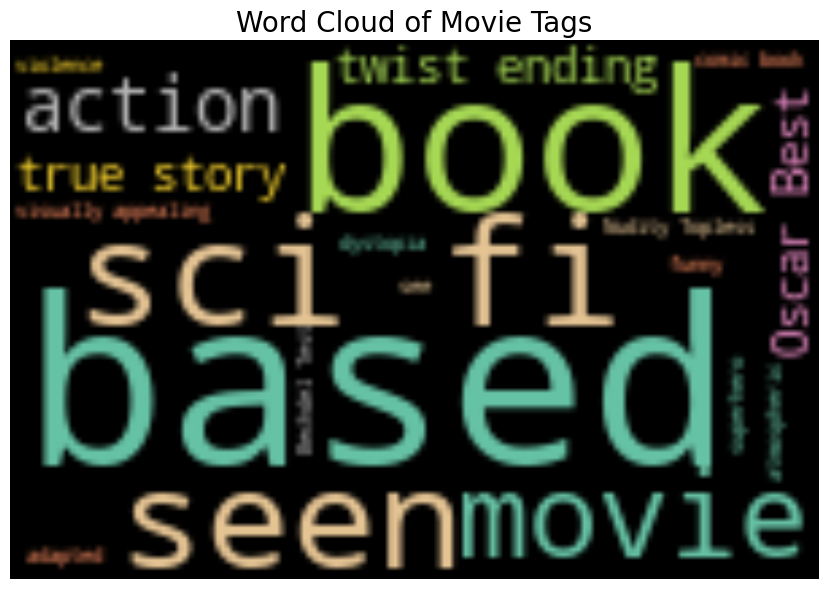

In [79]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all tags into one string
recent_tags = movie_rating_tags_df[movie_rating_tags_df['year'] > 2000]['tag']

text = ' '.join(recent_tags.dropna().astype(str).tolist())

# Generate the word cloud
wordcloud = WordCloud(width=150, height=100, background_color='black', colormap='Set2').generate(text)

# Display the word cloud
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Movie Tags', fontsize=20)
plt.show()


### Next: Visualisation 7 - Time based analysis - Monthly and weekly trends:
This time-based analysis investigates how user engagement with movie ratings varies across months and days of the week by extracting temporal features from the rating timestamps. By calculating both the average rating and total rating count per month and per weekday, the seasonal and weekly engagement patterns are uncovered. For example, users may be more active during holidays or weekends. This insight helps platforms optimize content timing, releasing or promoting movies when user activity is highest. It also enhances user experience through time-aware recommendations, such as suggesting feel-good movies for weekends or promoting trending genres in summer. For machine learning, temporal features like month and weekday serve as useful inputs for recommendation systems, improving accuracy and personalization. These features can also help solve the cold-start problem by aligning new content with high-activity timeframes. Overall, this analysis adds a valuable time dimension to user behavior understanding and model performance.


In [81]:
movie_rating_tags_df.head()

year  movieId      title  userId  rating    rating_timestamp  \
0  1995        1  Toy Story  108922     0.5 2010-09-15 22:14:06   
1  1995        1  Toy Story  108922     0.5 2010-09-15 22:14:06   
2  1995        1  Toy Story  108922     0.5 2010-09-15 22:14:06   
3  1995        1  Toy Story  108922     0.5 2010-09-15 22:14:06   
4  1995        1  Toy Story  108922     0.5 2010-09-15 22:14:06   

                  tag       tag_timestamp  Action  Adventure  ...  Musical  \
0            children 2010-09-15 22:14:29       0          1  ...        0   
1  computer animation 2010-09-15 22:14:28       0          1  ...        0   
2              Disney 2010-09-15 22:14:20       0          1  ...        0   
3              family 2010-09-15 22:14:33       0          1  ...        0   
4               Pixar 2010-09-15 22:14:25       0          1  ...        0   

   Mystery  Romance  Sci-Fi  Thriller  War  Western  average_rating  \
0        0        0       0         0    0        0        3.636585   
1        0        0       0         0    0        0        3.636585   
2        0        0       0         0    0        0        3.636585   
3        0        0       0         0    0        0        3.636585   
4        0        0       0         0    0        0        3.636585   

   rating_count  total_movies_per_year  
0          2870                    133  
1          2870                    133  
2          2870                    133  
3          2870                    133  
4          2870                    133  

[5 rows x 30 columns]

### Extracting the Month and the day of the week from the rating timestamp

In [83]:
movie_rating_tags_df['month'] = movie_rating_tags_df['rating_timestamp'].dt.month
movie_rating_tags_df['day_of_week'] = movie_rating_tags_df['rating_timestamp'].dt.day_name()
movie_rating_tags_df.head()

year  movieId      title  userId  rating    rating_timestamp  \
0  1995        1  Toy Story  108922     0.5 2010-09-15 22:14:06   
1  1995        1  Toy Story  108922     0.5 2010-09-15 22:14:06   
2  1995        1  Toy Story  108922     0.5 2010-09-15 22:14:06   
3  1995        1  Toy Story  108922     0.5 2010-09-15 22:14:06   
4  1995        1  Toy Story  108922     0.5 2010-09-15 22:14:06   

                  tag       tag_timestamp  Action  Adventure  ...  Romance  \
0            children 2010-09-15 22:14:29       0          1  ...        0   
1  computer animation 2010-09-15 22:14:28       0          1  ...        0   
2              Disney 2010-09-15 22:14:20       0          1  ...        0   
3              family 2010-09-15 22:14:33       0          1  ...        0   
4               Pixar 2010-09-15 22:14:25       0          1  ...        0   

   Sci-Fi  Thriller  War  Western  average_rating  rating_count  \
0       0         0    0        0        3.636585          2870   
1       0         0    0        0        3.636585          2870   
2       0         0    0        0        3.636585          2870   
3       0         0    0        0        3.636585          2870   
4       0         0    0        0        3.636585          2870   

   total_movies_per_year  month  day_of_week  
0                    133      9    Wednesday  
1                    133      9    Wednesday  
2                    133      9    Wednesday  
3                    133      9    Wednesday  
4                    133      9    Wednesday  

[5 rows x 32 columns]

### Group by month

In [85]:
# Group by month: average and count
monthly_avg = movie_rating_tags_df.groupby('month')['rating'].mean().reset_index(name='average_rating')
monthly_count = movie_rating_tags_df.groupby('month')['rating'].count().reset_index(name='rating_count')
monthly_count

month  rating_count
0       1          7433
1       2          6414
2       3          7950
3       4          7304
4       5          5608
5       6          7032
6       7          8658
7       8          5365
8       9          6433
9      10          4741
10     11          8138
11     12          6736

### Group by Day of week

In [87]:
# Group by day of week: average and count
day_avg = movie_rating_tags_df.groupby('day_of_week')['rating'].mean().reset_index(name='average_rating')
day_count = movie_rating_tags_df.groupby('day_of_week')['rating'].count().reset_index(name='rating_count')
day_count

day_of_week  rating_count
0      Friday         10387
1      Monday         12622
2    Saturday         11444
3      Sunday         14139
4    Thursday          9458
5     Tuesday         11311
6   Wednesday         12451

#### Time Based analysis of the ratings:

In [89]:
import plotly.express as px
import panel as pn


# Plotly charts
fig_month_avg = px.line(monthly_avg, x='month', y='average_rating', title='Average Rating by Month')
fig_month_count = px.line(monthly_count, x='month', y='rating_count', title='Rating Count by Month')

fig_day_avg = px.bar(day_avg, x='day_of_week', y='average_rating', title='Average Rating by Day of Week')
fig_day_count = px.bar(day_count, x='day_of_week', y='rating_count', title='Rating Count by Day of Week')

# a Panel layout
dashboard = pn.Column(
    "## Movie Ratings - Time Based Analysis",
    pn.Row(
        pn.Column("### Monthly Trends", pn.pane.Plotly(fig_month_avg), pn.pane.Plotly(fig_month_count)),
        pn.Column("### Weekly Trends", pn.pane.Plotly(fig_day_avg), pn.pane.Plotly(fig_day_count))
    )
)

# Serve the dashboard
dashboard.show()  


Launching server at http://localhost:60591


From the plot, it is evident that user engagement peaks in July (7th month) and November (11th month), as shown clearly in the rating count visualization. This indicates that users are most active during mid-year and year-end periods, possibly due to holidays or leisure time. The average rating plot, however, remains relatively stable across all months, ranging between 3.5 and 3.9, suggesting consistent rating behavior regardless of the season. Looking at weekdays, Sunday shows the highest user engagement based on rating count, while Tuesday slightly leads in terms of average rating—though averages across all days stay within a narrow band of 3.5 to 3.8. For users, the rating count plots are particularly insightful, offering an intuitive understanding of when the community is most active, helping them align with popular viewing times. For platforms, these patterns can inform timing strategies for content releases. This is enriched data for ML, as it helps to improve time-aware personalization in recommendation engines.

# Experiment 2: First Testing: Baseline Dash Layout using "Genre":

After successfully developing individual charts and feature-based plots, an initial dashboard layout was implemented using a single filter—Genre—to evaluate baseline interactivity and data responsiveness. Key variables incorporated in this first version included year (for trend analysis), 19 binary genre categories (for filtering), and rating count. A clean copy of the dataset, dashboard_df, was created to isolate and optimize data specifically for dashboard usage. This foundational setup enabled streamlined testing of genre-specific filtering and laid the groundwork for integrating more complex, multi-feature interactivity in future iterations.

For casual users, particularly those in the 18–35 age group, this setup offers an engaging way to explore genre popularity over time—enhancing both discovery and interaction.

From a machine learning perspective, genre remains a pivotal feature in recommendation systems. Time-based genre trends enrich collaborative filtering, support cold-start scenarios by leveraging genre history, and enable temporal clustering of user behavior for more personalized content delivery.


#### Copy into dashboard_df dataframe

In [92]:
movie_rating_tags_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81812 entries, 0 to 81811
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   year                   81812 non-null  int32         
 1   movieId                81812 non-null  int64         
 2   title                  81812 non-null  object        
 3   userId                 81812 non-null  int64         
 4   rating                 81812 non-null  float64       
 5   rating_timestamp       81812 non-null  datetime64[ns]
 6   tag                    81812 non-null  object        
 7   tag_timestamp          81812 non-null  datetime64[ns]
 8   Action                 81812 non-null  int32         
 9   Adventure              81812 non-null  int32         
 10  Animation              81812 non-null  int32         
 11  Children               81812 non-null  int32         
 12  Comedy                 81812 non-null  int32         
 13  C

In [93]:
dashboard_df = movie_rating_tags_df.iloc[:, [0, 2, 4, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]]
dashboard_df.columns


Index(['year', 'title', 'rating', 'tag', 'Action', 'Adventure', 'Animation',
       'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
       'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance',
       'Sci-Fi', 'Thriller', 'War', 'Western', 'average_rating',
       'rating_count', 'total_movies_per_year', 'month', 'day_of_week'],
      dtype='object')

In [94]:
import dash
from dash import dcc, Dash, html, Input, Output, dash_table
import plotly.express as px
import pandas as pd


### Dash application:

In [96]:
app_genre_exp=Dash()

In [97]:
genre_cols = ['Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western']

# Layout of the Dashboard:

### Title of the Dashboard
app_genre_exp.layout = html.Div([
    html.H1('Genre Explorer Dashboard'),
    html.P('This helps to explore the number of ratings for all years for all the genres'),

    
### Dropdown for genre selection
    dcc.Dropdown(
        id='genre-dropdown',
        options=[{'label': genre, 'value': genre} for genre in genre_cols],
        value='Action',  # default value
        clearable=False,
        style={'width': '300px', 'margin': '0 auto'}
    ),
    
### Graph for genre plot
    dcc.Graph(id='genre-plot')
])

In [98]:
# Callback for updating the plot

@app_genre_exp.callback(
    Output('genre-plot', 'figure'),
    Input('genre-dropdown', 'value')
)

def update_graph(selected_genre):
    # Filter the dataframe by the selected genre
    filtered_df = dashboard_df[dashboard_df[selected_genre] == 1]

    # Group by year and count the ratings for the selected genre
    yearly_counts = filtered_df.groupby('year')['rating'].count().reset_index()
    yearly_counts.rename(columns={'rating': 'Number of ratings'}, inplace=True)

    # Create the plot
    line_fig = px.line(
        yearly_counts,
        x='year', y='Number of ratings',
#        title=f'Rating for {selected_genre} Genre'
    )
    
    return line_fig

In [99]:
if __name__ == '__main__':
    app_genre_exp.run_server(debug=True, port=8052)

The baseline plot, equipped with a dropdown for genre selection, offers users a clear and intuitive way to explore the data. The interactive line plot visualizes trends over the years, providing an immediate and insightful picture of how each genre has evolved in terms of user engagement. This simplicity and clarity make the dashboard accessible to casual users while offering meaningful patterns for deeper analysis.

# Experiment 3: Baseline Panel (with Outliers) layout testing with Dash:

This dashboard panel enables dynamic exploration of movie rating trends over time, focusing on identifying high-rated outliers using a user-controlled slider. By adjusting the rating threshold, users can highlight movies from any year that exceed the selected value, making it easy to spot critically acclaimed films across decades. The line plot shows the average rating per year, while orange markers represent standout movies rated above the threshold. For users, especially movie enthusiasts or casual viewers, this offers an intuitive way to discover top-rated content from specific periods. For machine learning applications, the visualization supports outlier detection, temporal trend analysis, and feature engineering by encoding high-rating thresholds, which can improve recommendation systems and predictive modeling. This adds a valuable time-aware dimension to both user experience and ML model performance.

In [102]:
import holoviews as hv
import hvplot.pandas
import param
import panel as pn
import panel.widgets as pnw


In [103]:

app_panel = dash.Dash(__name__)

# Layout with title, slider, graph, and table
app_panel.layout = html.Div([
    html.H1("Movies Explorer Dashboard with Outliers"),

    html.Div([
        html.Label("Rating Threshold:"),
        dcc.Slider(
            id='threshold-slider',
            min=3.0,
            max=5.0,
            step=0.1,
            value=4.5,
            marks={i: f"{i}" for i in np.arange(3, 5.1, 0.5)},
        )
    ], style={'width': '80%', 'padding': '20px'}),

    dcc.Graph(id='rating-trend'),

   ])

# Callback to update the graph
@app_panel.callback(
    Output('rating-trend', 'figure'),
    Input('threshold-slider', 'value')
)
def update_graph(threshold):
    # Group by year to get average ratings
    avg_by_year = dashboard_df.groupby('year')['rating'].mean().reset_index()

    # Find high-rated outliers
    outliers = dashboard_df[dashboard_df['rating'] > threshold]

    # Create figure
    fig = px.line(avg_by_year, x='year', y='rating', title='Average Rating by Year',
                  labels={'rating': 'Average Rating', 'year': 'Year'})
    fig.add_scatter(
        x=outliers['year'],
        y=outliers['rating'],
        mode='markers',
        marker=dict(color='orange', size=8),
        name=f'Outliers > {threshold}'
    )
    return fig

# Run the app
if __name__ == '__main__':
    app_panel.run_server(debug=True, port=8056)

#### Relation of Dash vs. Outlier Plots to Users in the Movie Industry
The standard Dash plot, which displays trends and rating counts over time, is particularly effective for casual viewers in the 18–35 age group. This demographic typically explores popular genres and widely watched films, often relying on trends to guide their viewing choices. From an industry perspective, such visualizations help inform marketing strategies, release timing, and content planning, especially in relation to seasonal demand or shifts in viewer interests.

In contrast, the Outliers Plot, typically implemented through a Panel interface, is designed to highlight exceptional films, those with unusually high ratings that might not appear in mainstream popularity charts. This appeals more to niche users or cinephiles who are interested in discovering hidden gems, cult classics, or unexpected successes. For studios and platforms, such a plot can help identify titles with strong critical reception or loyal niche audiences, guiding future investment or targeted promotional efforts. 

While both plots offer meaningful insights, they serve distinct user behaviors. Dash Plot supports mass preferences and casual discovery. Outlier Plot caters to refined tastes and specialized exploration. In this project, the Dash layout was chosen over the more analytical Panel-based Outlier plot. The primary reason is its suitability for the target audience (18–35 years, a group largely made up of casual viewers who prioritize popular and trending content. Therefore, the simplified and visually engaging Dash dashboard was deemed more appropriate, while the more complex Panel with outlier detection was excluded to maintain ease of use and relevance.



## Experiment 4: Popularity of movie genres by Year - Baseline model using Dash and Animation Frame by Year
In this model, an animated bar chart was created to display the popularity of different movie genres over the years. The key technique used was melt, which transformed the multiple genre indicator columns into a single, tidy column format. This long-format structure simplifies data manipulation, filtering, grouping, and visualization, making it more intuitive and efficient. By using melt, the model can easily analyze genre popularity trends over time in a clean and scalable manner. This approach improves upon earlier wide-format models, which were more complex, less flexible, and harder to scale or animate. 

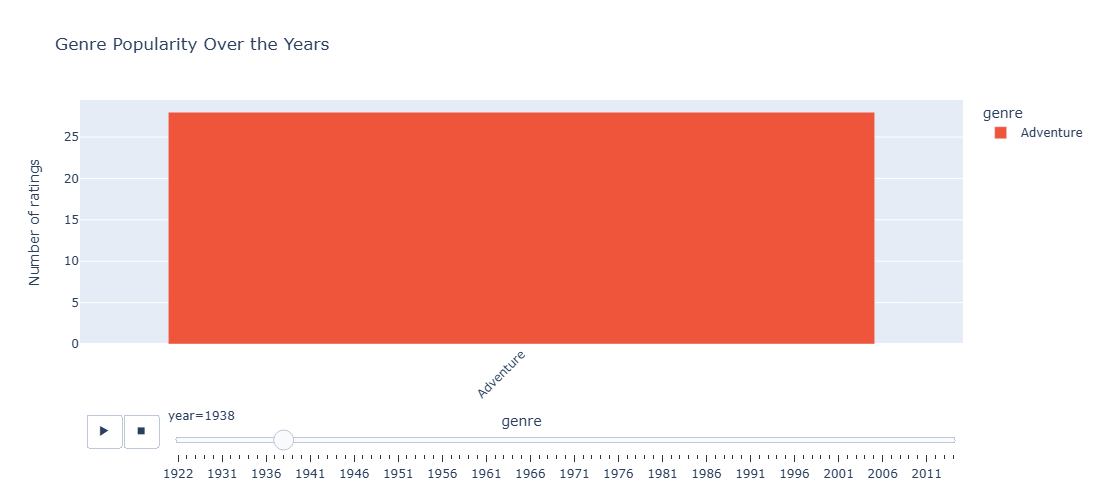

In [106]:
# Step 1: Melt genre columns
genre_cols = ['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary',
              'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery',
              'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

# Melt the dataframe
df_melted = dashboard_df.melt(
    id_vars=['title', 'year', 'rating'],
    value_vars=genre_cols,
    var_name='genre',
    value_name='is_genre'
)

# Step 2: Filter to rows where movie is of that genre
df_genre = df_melted[df_melted['is_genre'] == 1]

# Step 3: Group by year and genre
genre_counts = df_genre.groupby(['year', 'genre'])['rating'].count().reset_index()
genre_counts.rename(columns={'rating': 'Number of ratings'}, inplace=True)

# Step 4: Plot
fig = px.bar(
    genre_counts,
    x='genre',
    y='Number of ratings',
    animation_frame='year',
    color='genre',
    title='Genre Popularity Over the Years',
    labels={'rating_count': 'Rating Count'},
    height=500
)

fig.update_layout(xaxis_tickangle=-45)
fig.show()

Using animation_frame='year' in the animated genre popularity chart has reduced clarity and user value. The animation progresses too quickly through the years, and genres appear and disappear due to fluctuations in data, creating visual clutter. As a result, users find it difficult to compare or absorb information year-by-year. Animated charts work best when trends evolve smoothly over time and categories remain consistent across frames—allowing viewers time to interpret each transition.

In this case, the number of ratings per genre varies significantly by year, and not all genres are represented consistently. This leads to a jumpy, hard-to-follow animation that hinders rather than enhances user experience. While the animated chart is visually dynamic and may appeal to a broad, younger audience, it lacks the precision needed for analytical comparison. In contrast, the baseline Dash plot offers a cleaner, more straightforward presentation of core rating trends, ideal for users seeking quick insights.

The outlier plot, which highlights standout movies above a rating threshold, serves a more niche or analytical audience. However, for the target demographic of casual users aged 18–35, such specialized visualizations—especially animated or outlier-based plots—may offer limited practical value. While these advanced plots can be informative in specific contexts, a more tailored version would be required to truly benefit casual viewers. Developing such specialized tools, however, lies beyond the scope of this study.



## Experiment 5: Dash Dashboard with Table and lineplot:
In this experiment, a Dash dashboard was developed featuring a genre dropdown that allows users to select a genre and view the top movies within that genre, displayed in a table sorted by rating count in descending order. Below the table, a line plot visualizes the trend of the selected genre’s rating counts over the years compared to the total ratings of all other genres.

The layout initially positions the genre dropdown filter centrally, with the dashboard title aligned to the left. This combined table and line plot setup offers users both detailed data (specific movies and counts) and an overview of genre trends, making it easier to explore and understand genre popularity patterns over time.

#### LAYOUT - Title, Dropdown, Table of Movies, Line plot

In [110]:
app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Genre Explorer Dashboard", style={"textAlign": "center"}),

    dcc.Dropdown(
        id='genre-dropdown',
        options=[{"label": genre, "value": genre} for genre in genre_cols],
        value='Action',
        clearable=False,
        style={'width': '50%', 'margin': '0 auto'}
    ),
    html.Br(),

    html.H4("Top 25 Movies by number of ratings", style={"textAlign": "center"}),

    dash_table.DataTable(
        id='top-movies-table',
        columns=[
            {"name": "Title", "id": "title"},
            {"name": "Number of Ratings", "id": "rating_count"}
        ],
        style_table={'margin': '0 auto', 'width': '80%'},
        style_cell={'textAlign': 'left', 'padding': '5px'},
        style_header={'fontWeight': 'bold'}
    ),
    html.Br(),

    html.H4("Genre by number of ratings Over Years", style={"textAlign": "center"}),

    dcc.Graph(id='rating-count-plot')
])


In [111]:
@app.callback(
    [Output('top-movies-table', 'data'),
     Output('rating-count-plot', 'figure')],
    [Input('genre-dropdown', 'value')]
)
def update_dashboard(selected_genre):
    # Filter to selected genre
    genre_df = dashboard_df[dashboard_df[selected_genre] == 1]

    # --- Table: Top 25 titles by rating count ---
    top_movies = genre_df.groupby('title').agg(rating_count=('rating', 'count')).reset_index()
    top_movies = top_movies.sort_values(by='rating_count', ascending=False).head(25)
    table_data = top_movies.to_dict('records')

    # --- Plot: Rating counts per year ---
    genre_yearly = genre_df.groupby('year').agg(rating_count=('rating', 'count')).reset_index()
    genre_yearly['Genre'] = selected_genre

    # All other genres
    rest_df = dashboard_df[dashboard_df[selected_genre] != 1]
    rest_yearly = rest_df.groupby('year').agg(rating_count=('rating', 'count')).reset_index()
    rest_yearly['Genre'] = 'Other Genres'

    # Combine both for plotting
    combined = pd.concat([genre_yearly, rest_yearly])

    fig = px.line(
        combined,
        x='year',
        y='rating_count',
        color='Genre',
        title=f"{selected_genre} vs. Other Genres: Rating Counts by Year",
        markers=True,
      template='plotly_dark'
    )

    return table_data, fig

In [112]:
if __name__ == '__main__':
    app.run_server(debug=True, port=8057)

This dashboard effectively presents essential information by displaying the top movies by rating count in a table, complemented by a line graph that illustrates how the selected genre trends over time relative to other genres. While the functionality is informative and supports user exploration, the visual design is relatively plain and minimalistic. This lack of aesthetic enhancement may reduce user engagement, especially among younger users or casual viewers who are drawn to visually rich, interactive interfaces. To improve usability and retention, future iterations could benefit from more polished UI elements, vibrant styling, and interactive features such as hover effects, responsive cards, or genre-based highlights.


## Experiment 6: Genre Dashboard with Bar Plots and Line Plots using Dash:

To enhance visual appeal and user interaction, the static movie table was replaced with a bar chart on the left, showcasing the top-rated movies within the selected genre. The line plot illustrating the genre's trend over time was retained on the right for continuity. This new layout was designed to better capture attention and make data interpretation more intuitive. Due to time and resource constraints, advanced table formatting and interactivity were not implemented; instead, this phase focused on testing more visually engaging alternatives to evaluate their effectiveness for the intended audience.

In [114]:
app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Genre Explorer Dashboard", style={"textAlign": "center"}),

    dcc.Dropdown(
        id='genre-dropdown',
        options=[{"label": genre, "value": genre} for genre in genre_cols],
        value='Action',
        clearable=False,
        style={'width': '50%', 'margin': '0 auto'}
    ),
    html.Br(),

    html.Div([
        html.Div([
            html.H4("Top 25 Movies", style={"textAlign": "center"}),
            dcc.Graph(id='top-movies-bar', style={'height': '600px'})
        ], style={
            'flex': '1 1 45%',  # grow, shrink, basis
            'minWidth': '300px',
            'marginRight': '20px'
        }),

        html.Div([
            html.H4(" Genre trend Over Years", style={"textAlign": "center"}),
            dcc.Graph(id='rating-count-plot', style={'height': '600px'})
        ], style={
            'flex': '1 1 55%',
            'minWidth': '300px'
        })
    ], style={
        'display': 'flex',
        'flexWrap': 'wrap',
        'justifyContent': 'center',
        'alignItems': 'flex-start'
    })
])



@app.callback(
    [Output('top-movies-bar', 'figure'),
     Output('rating-count-plot', 'figure')],
    [Input('genre-dropdown', 'value')]
)
def update_dashboard(selected_genre):
    # Filter to selected genre
    genre_df = dashboard_df[dashboard_df[selected_genre] == 1]

    # Bar plot data: Top 25 movies by rating count
    top_movies = genre_df.groupby('title').agg(rating_count=('rating', 'count')).reset_index()
    top_movies = top_movies.sort_values(by='rating_count', ascending=False).head(25)

    bar_fig = px.bar(
        top_movies[::-1],  
        x='rating_count',
        y='title',
        orientation='h',
        title=f"Top 25 {selected_genre} Movies by Rating Count",
        labels={'rating_count': 'Rating Count', 'title': 'Movie Title'},
        height=600
    )
    bar_fig.update_layout(margin=dict(l=150))  # More left margin for long titles

    # Line plot: Rating counts per year
    genre_yearly = genre_df.groupby('year').agg(rating_count=('rating', 'count')).reset_index()
    genre_yearly['Genre'] = selected_genre

    rest_df = dashboard_df[dashboard_df[selected_genre] != 1]
    rest_yearly = rest_df.groupby('year').agg(rating_count=('rating', 'count')).reset_index()
    rest_yearly['Genre'] = 'Other Genres'

    combined = pd.concat([genre_yearly, rest_yearly])

    line_fig = px.line(
        combined,
        x='year',
        y='rating_count',
        color='Genre',
        title=f"{selected_genre} vs Other Genres: Rating Counts by Year",
        markers=True,
        template='plotly_dark'
    )

    return bar_fig, line_fig


if __name__ == '__main__':
    app.run_server(debug=True, port=8058)


This plot layout offers clarity to users by presenting information in a straightforward and accessible manner. Displaying the top movies within the selected genre alongside the trend of that genre compared to others over the years enables users to quickly grasp both popular titles and evolving genre preferences. This dual-visual approach effectively balances detailed movie-level insights with broader trend analysis, making it well-suited for engaging the target audience. For these reasons, this design approach was selected for the final dashboard.


## Experiment 7: Enhancing the Experiment 6 Dashboard with Two Dropdowns (Year and Genre)
In this approach, the addition of a year dropdown allows users to filter information more precisely. On the left side, a bar plot displays the top movies by rating count for the selected genre and year, while the right side features a bar plot showcasing the trending recent movies. Below these two plots, a line plot illustrates the genre’s trend over multiple years. This layout provides users with relevant, hierarchical, and well-organized information upon visiting the dashboard. Users can select their preferred year and genre to view the top-rated movies, trending titles, and the genre’s long-term performance. The presentation is clear and balanced, avoiding clutter by distributing information across two primary plots and a trendline. This thoughtful design helps maintain user engagement by immediately providing the most sought-after insights.

In [116]:
# Create app
app_black_blue_white = dash.Dash(__name__)
app_black_blue_white.title = "Movies Explorer Dashboard"

# Define genre columns before layout
genre_cols = ['Action', 'Adventure', 'Animation', 'Children',
              'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
              'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
              'War', 'Western']

# App layout
app_black_blue_white.layout = html.Div([
    html.H1("Movies Explorer Dashboard", style={
        'textAlign': 'center',
        'color': '#00ffe5',
        'marginBottom': '30px',
        'fontSize': '32px'
    }),

    # FILTERS
    html.Div([
        html.Div([
            html.Label("Year", style={'color': 'white'}),
            dcc.Dropdown(
                id='year-dropdown',
                options=[{'label': str(y), 'value': y} for y in sorted(movie_rating_tags_df['year'].dropna().unique())],
                placeholder="Select Year",
                style={
                    'width': '140px',
                    'color': 'white',
                    'backgroundColor': '#222',
                    'border': '1px solid #555',
                }
            )
        ], style={'marginRight': '20px'}),

        html.Div([
            html.Label("Genre", style={'color': 'white'}),
            dcc.Dropdown(
                id='genre-dropdown',
                options=[{'label': g, 'value': g} for g in genre_cols],
                placeholder="Select Genre",
                style={
                    'width': '200px',
                    'color': 'white',
                    'backgroundColor': '#222',
                    'border': '1px solid #555',
                }
            )
        ])
    ], style={'display': 'flex', 'flexDirection': 'row', 'marginBottom': '30px'}),

    # CHARTS: LEFT = Top Movies | RIGHT = Trending Now
    html.Div([
        html.Div([
            dcc.Graph(id='top-movies-plot', style={'backgroundColor': '#1e1e1e'})
        ], style={'width': '48%', 'display': 'inline-block', 'verticalAlign': 'top'}),

        html.Div([
            html.H3("Trending Now", style={'textAlign': 'center', 'color': '#ffa726'}),
            dcc.Graph(id='trending-plot', style={'backgroundColor': '#1e1e1e'})
        ], style={'width': '48%', 'display': 'inline-block', 'paddingLeft': '2%'})
    ], style={'marginBottom': '40px'}),

    # BOTTOM LINE PLOT (Full Width)
    html.Div([
        dcc.Graph(id='rating-line-plot', style={'backgroundColor': '#1e1e1e'})
    ])
], style={
    'backgroundColor': '#111',
    'color': 'white',
    'padding': '20px',
    'minHeight': '100vh',
    'fontFamily': 'Arial, sans-serif'
})

# Callback: Top 10 Movies
@app_black_blue_white.callback(
    Output('top-movies-plot', 'figure'),
    Input('year-dropdown', 'value'),
    Input('genre-dropdown', 'value')
)
def update_top_movies(selected_year, selected_genre):
    filtered_df = dashboard_df.copy()

    if selected_year:
        filtered_df = filtered_df[filtered_df['year'] == selected_year]
    if selected_genre:
        filtered_df = filtered_df[filtered_df[selected_genre] == 1]

    top_movies = (filtered_df
                  .groupby('title')['rating_count']
                  .sum()
                  .reset_index()
                  .sort_values('rating_count', ascending=False)
                  .head(10))

    fig = px.bar(top_movies,
                 x='rating_count', y='title',
                 orientation='h',
                 title=f"Top Movies{f' in {selected_year}' if selected_year else ''}{f' - {selected_genre}' if selected_genre else ''}",
                 labels={'rating_count': 'Rating Count', 'title': 'Movies'},
                 template='plotly_dark')
    fig.update_layout(yaxis={'categoryorder': 'total ascending'})
    return fig
# Callback: Trending Movies
@app_black_blue_white.callback(
    Output('trending-plot', 'figure'),
    Input('year-dropdown', 'value')  # triggers update
)
def update_trending(_):
    trending = (movie_rating_tags_df[movie_rating_tags_df['year'] >= 2014]
                .groupby('title')['rating_count']
                .sum()
                .reset_index()
                .sort_values('rating_count', ascending=False)
                .head(10))

    fig = px.bar(trending,
                 x='rating_count', y='title',
                 orientation='h',
#                 title='Trending Movies',
                 labels={'rating_count': 'Rating Count', 'title': 'Movies'},
                 template='plotly_dark')
    fig.update_layout(yaxis={'categoryorder': 'total ascending'})
    return fig

# Callback: Rating Trend
@app_black_blue_white.callback(
    Output('rating-line-plot', 'figure'),
    Input('year-dropdown', 'value'),
    Input('genre-dropdown', 'value')
)
def update_rating_line(selected_year, selected_genre):
    filtered_df = dashboard_df.copy()

    # Only filter by genre to preserve multiple years for trend
    if selected_genre:
        filtered_df = filtered_df[filtered_df[selected_genre] == 1]

    line_data = (filtered_df.groupby('year')
                 .agg(avg_rating=('rating', 'mean'),
                      total_rating_count=('rating_count', 'sum'))
                 .reset_index())

    fig = px.line(line_data,
                  x='year', y='total_rating_count',
                  markers=True,
                  title='Our Rating Trend',
                  labels={'total_rating_count': 'Total Rating Count', 'year': 'Year'},
                  template='plotly_dark')
    return fig
# Callbacks 

# Run server
if __name__ == '__main__':
    app_black_blue_white.run_server(debug=True, port=8059)


The selected color scheme of a black background with white text and blue plots successfully enhances visual hierarchy, readability, and engagement, particularly for the target 18–35 age group. It gives the dashboard a modern, professional look that appeals to tech-savvy users. However, the black background, while high in contrast, may feel too harsh for some, and the default blue plots, though clear, lacked variety. To address this, alternative schemes were tested. These variations aimed to improve aesthetic appeal, reduce visual fatigue, and better reflect the dynamic nature of the movie industry, ultimately making the dashboard more immersive and engaging. 

## Experiment 8: Dashboard Color Scheme
After finalizing the core features, dropdowns, plots, and layout, this experiment focused on selecting a color scheme that enhances both visual appeal and usability for the target audience of 18–35-year-olds. This demographic, being digitally native and visually driven, expects modern interfaces that are intuitive and engaging. Various schemes were analysed, monotonous, analogous, and complementary. Out of the three styles, Complementary color schemes proved the most effective. These schemes create strong contrast, which is essential in data-heavy dashboards to direct attention, distinguish visual elements, and enhance readability. This contrast aligns well with the preferences of tech-savvy users who are accustomed to dynamic web and mobile interfaces.

Design Goals:
1. Modern Aesthetic: Reflects trends in digital design platforms (e.g., streaming services, social media).
2. Contrast for Clarity: Helps highlight key metrics and differentiate genres or categories.
3. Balance of Bright and Subtle: Bright colors are used selectively for plots and active elements; background and text remain subtle for comfort.

## Experiment 9: Dashboard Color Scheme: White background with blue texts:
The white background with blue text offers a clean and balanced look with clear visual hierarchy, making the dashboard easy to read. However, while it enhances clarity, it appears too plain and lacks the visual appeal needed to captivate the 18–35 target audience. The minimal contrast and simplicity may reduce user engagement over time, and needs further experimentation with more vibrant and dynamic color combinations to create a more engaging and modern user experience.

In [119]:
genre_cols = ['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary',
              'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery',
              'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

# Create app
app_white_blue = dash.Dash(__name__)
app_white_blue.title = "Movies Explorer Dashboard"

# App layout
app_white_blue.layout = html.Div([
    html.H1(" Movies Explorer Dashboard", style={'textAlign': 'center', 'color': 'darkorange'}),

    html.Div([
        # Dropdowns
        html.Div([
            html.Label("Year", style={'marginRight': '10px', 'color': 'black'}),
            dcc.Dropdown(
                id='year-dropdown',
                options=[{'label': str(y), 'value': y} for y in sorted(movie_rating_tags_df['year'].dropna().unique())],
                placeholder="Select Year",
                style={'width': '140px'}
            )
        ], style={'marginRight': '20px'}),

        html.Div([
            html.Label("Genre", style={'marginRight': '10px', 'color': 'black'}),
            dcc.Dropdown(
                id='genre-dropdown',
                options=[{'label': g, 'value': g} for g in genre_cols],
                placeholder="Select Genre",
                style={'width': '200px'}
            )
        ])
    ], style={'display': 'flex', 'flexDirection': 'row', 'marginBottom': '20px'}),

    html.Div([
        html.Div([
            dcc.Graph(id='top-movies-plot')
        ], style={'width': '48%', 'display': 'inline-block', 'verticalAlign': 'top'}),

        html.Div([
            html.H3(" Trending Now", style={'textAlign': 'center', 'color': 'teal'}),
            dcc.Graph(id='trending-plot')
        ], style={'width': '48%', 'display': 'inline-block', 'paddingLeft': '2%'})
    ]),

    html.Div([
        html.H3("Rating Trend", style={'color': 'maroon', 'textAlign': 'left'}),
        dcc.Graph(id='rating-line-plot')
    ])
], style={
    'backgroundColor': 'white',
    'color': 'black',
    'padding': '20px',
    'fontFamily': 'Arial'
})

# Callback: Top 10 Movies
@app_white_blue.callback(
    Output('top-movies-plot', 'figure'),
    Input('year-dropdown', 'value'),
    Input('genre-dropdown', 'value')
)
def update_top_movies(selected_year, selected_genre):
    filtered_df = movie_rating_tags_df.copy()

    if selected_year:
        filtered_df = filtered_df[filtered_df['year'] == selected_year]
    if selected_genre:
        filtered_df = filtered_df[filtered_df[selected_genre] == 1]

    top_movies = (filtered_df
                  .groupby('title')['rating_count']
                  .sum()
                  .reset_index()
                  .sort_values('rating_count', ascending=False)
                  .head(6))

    fig = px.bar(top_movies,
                 x='rating_count', y='title',
                 orientation='h',
                 title=f"Top Movies{f' in {selected_year}' if selected_year else ''}{f' - {selected_genre}' if selected_genre else ''}",
                 labels={'rating_count': 'Rating Count', 'title': ''},
                 template='plotly_white')
    fig.update_layout(yaxis={'categoryorder': 'total ascending'}, yaxis_tickfont=dict(size=10, family='Arial', color='black')  
)
    return fig
# Callback: Trending Movies
@app_white_blue.callback(
    Output('trending-plot', 'figure'),
    Input('year-dropdown', 'value')  # triggers update
)
def update_trending(_):
    trending = (movie_rating_tags_df[movie_rating_tags_df['year'] >= 2014]
                .groupby('title')['rating_count']
                .sum()
                .reset_index()
                .sort_values('rating_count', ascending=False)
                .head(10))

    fig = px.bar(trending,
                 x='rating_count', y='title',
                 orientation='h',
#                 title='Trending Movies',
                 labels={'rating_count': 'Rating Count', 'title': ''},
                 template='plotly_white')
    fig.update_layout(yaxis={'categoryorder': 'total ascending'}, yaxis_tickfont=dict(size=10, family='Arial', color='black') )
    return fig

# Callback: Rating Trend
@app_white_blue.callback(
    Output('rating-line-plot', 'figure'),
    Input('year-dropdown', 'value'),
    Input('genre-dropdown', 'value')
)
def update_rating_line(selected_year, selected_genre):
    filtered_df = movie_rating_tags_df.copy()

    if selected_genre:
        filtered_df = filtered_df[filtered_df[selected_genre] == 1]

    line_data = (filtered_df.groupby('year')
                 .agg(avg_rating=('rating', 'mean'),
                      total_rating_count=('rating_count', 'sum'))
                 .reset_index())

    fig = px.line(line_data,
                  x='year', y='total_rating_count',
                  markers=True,
#                  title='Our Rating Trend',
                  labels={'total_rating_count': 'Total Rating Count', 'year': 'Year'},
                  template='plotly_white')
    return fig

# Run server
if __name__ == '__main__':
    app_white_blue.run_server(debug=True, port=8061)

## Experiment 10: Dashboard Color Scheme: Black background with gold texts::
The black background with gold text and plots stands out as the most effective and engaging visual design, grounded in both principles of design and color theory. According to the principle of contrast, this combination creates a strong visual hierarchy that draws the user’s eye to key elements, such as dropdowns and plots. The dark background recedes, allowing the gold elements—which are bright, warm, and energetic—to advance visually, making data instantly readable and aesthetically compelling.

From a color theory perspective, gold (a warm hue) on black (a neutral dark tone) forms a high-contrast complementary pairing, enhancing legibility and evoking a sense of luxury and prestige. This aligns with the visual expectations of the 18–35 age group, a demographic that is highly responsive to bold, cinematic aesthetics due to their familiarity with digital media and entertainment platforms.

Moreover, the use of alignment and balance in the dashboard layout ensures that dropdowns are clearly positioned (top-left for intuitive navigation), and the plots are well-distributed, avoiding visual clutter. The repetition of gold across plots and labels strengthens cohesion, while the emphasis principle ensures that important data stands out. This synergy of thoughtful color use and foundational design principles not only improves usability but also creates an immersive, visually polished experience tailored for modern users in the entertainment industry.



In [121]:
genre_cols = ['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary',
              'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery',
              'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

# Create app
app_black_gold = dash.Dash(__name__)
app_black_gold.title = "Movies Explorer Dashboard"

# App layout
app_black_gold.layout = html.Div([
    html.H1("Movies Explorer Dashboard", style={'textAlign': 'center', 'color': '#FFD700'}),

    html.Div([
        html.Div([
            html.Label("Year", style={'marginRight': '10px', 'color': '#FFD700'}),
            dcc.Dropdown(
                id='year-dropdown',
                options=[{'label': str(y), 'value': y} for y in sorted(movie_rating_tags_df['year'].dropna().unique())],
                placeholder="Select Year",
                style={'width': '140px', 'backgroundColor': '#111', 'color': '#FFD700'}
            )
        ], style={'marginRight': '20px'}),

        html.Div([
            html.Label("Genre", style={'marginRight': '10px', 'color': '#FFD700'}),
            dcc.Dropdown(
                id='genre-dropdown',
                options=[{'label': g, 'value': g} for g in genre_cols],
                placeholder="Select Genre",
                style={'width': '200px', 'backgroundColor': '#111', 'color': '#FFD700'}
            )
        ])
    ], style={'display': 'flex', 'flexDirection': 'row', 'marginBottom': '20px'}),

    html.Div([
        html.Div([
            dcc.Graph(id='top-movies-plot')
        ], style={'width': '48%', 'display': 'inline-block', 'verticalAlign': 'top'}),

        html.Div([
            html.H3("Trending Now", style={'textAlign': 'center', 'color': '#FFD700'}),
            dcc.Graph(id='trending-plot')
        ], style={'width': '48%', 'display': 'inline-block', 'paddingLeft': '2%'})
    ]),

    html.Div([
        html.H3("Rating Trend", style={'color': '#FFD700', 'textAlign': 'left'}),
        dcc.Graph(id='rating-line-plot')
    ])
], style={
    'backgroundColor': '#000000',  # Black background
    'color': '#FFD700',            # Gold text
    'padding': '20px',
    'fontFamily': 'Arial'
})

# Callback: Top 10 Movies
@app_black_gold.callback(
    Output('top-movies-plot', 'figure'),
    Input('year-dropdown', 'value'),
    Input('genre-dropdown', 'value')
)
def update_top_movies(selected_year, selected_genre):
    filtered_df = dashboard_df.copy()

    if selected_year:
        filtered_df = filtered_df[filtered_df['year'] == selected_year]
    if selected_genre:
        filtered_df = filtered_df[filtered_df[selected_genre] == 1]

    top_movies = (filtered_df
                  .groupby('title')['rating_count']
                  .sum()
                  .reset_index()
                  .sort_values('rating_count', ascending=False)
                  .head(6))

    fig = px.bar(top_movies,
                 x='rating_count', y='title',
                 orientation='h',
                 title=f"Top Movies{f' in {selected_year}' if selected_year else ''}{f' - {selected_genre}' if selected_genre else ''}",
                 labels={'rating_count': 'Rating Count', 'title': ''},
                 template='plotly_dark', color_discrete_sequence=['#FFD700'])

    fig.update_layout(
        yaxis={'categoryorder': 'total ascending'},
        font=dict(color='#FFD700'),
        plot_bgcolor='#000',
        paper_bgcolor='#000',
        yaxis_tickfont=dict(size=10, family='Arial', color='#FFD700'),
        title_font=dict(color='#FFD700')
    )
    return fig

# Callback: Trending Movies
@app_black_gold.callback(
    Output('trending-plot', 'figure'),
    Input('year-dropdown', 'value')
)
def update_trending(_):
    trending = (movie_rating_tags_df[movie_rating_tags_df['year'] >= 2014]
                .groupby('title')['rating_count']
                .sum()
                .reset_index()
                .sort_values('rating_count', ascending=False)
                .head(10))

    fig = px.bar(trending,
                 x='rating_count', y='title',
                 orientation='h',
                 labels={'rating_count': 'Rating Count', 'title': ''},
                 template='plotly_dark', color_discrete_sequence=['#FFD700'])

    fig.update_layout(
        yaxis={'categoryorder': 'total ascending'},
        font=dict(color='#FFD700'),
        plot_bgcolor='#000',
        paper_bgcolor='#000',
        yaxis_tickfont=dict(size=10, family='Arial', color='#FFD700')
    )
    return fig

# Callback: Rating Trend
@app_black_gold.callback(
    Output('rating-line-plot', 'figure'),
    Input('year-dropdown', 'value'),
    Input('genre-dropdown', 'value')
)
def update_rating_line(selected_year, selected_genre):
    filtered_df = dashboard_df.copy()

    if selected_genre:
        filtered_df = filtered_df[filtered_df[selected_genre] == 1]

    line_data = (filtered_df.groupby('year')
                 .agg(avg_rating=('rating', 'mean'),
                      total_rating_count=('rating_count', 'sum'))
                 .reset_index())

    fig = px.line(line_data,
                  x='year', y='total_rating_count',
                  markers=True,
                  labels={'total_rating_count': 'Total Rating Count', 'year': 'Year'},
                  template='plotly_dark', color_discrete_sequence=['#FFD700'])

    fig.update_layout(
        font=dict(color='#FFD700'),
        plot_bgcolor='#000',
        paper_bgcolor='#000',
        title_font=dict(color='#FFD700')
    )
    return fig

# Run server
if __name__ == '__main__':
    app_black_gold.run_server(debug=True, port=8063)

## Experiment 11: Dashboard Color Scheme: Black background with red texts:
In this variation, a black background paired with red texts and plots was tested to explore another high-contrast combination aligned with color theory. This pairing also adheres to the principle of contrast, ensuring key elements stand out sharply against the dark backdrop, drawing user focus to dropdowns, graphs, and titles. Red, a warm and emotionally intense color, naturally evokes urgency, excitement, and energy—qualities that align well with the entertainment industry and appeal to the 18–35 age group, who are drawn to visually bold, dynamic interfaces.

In terms of visual hierarchy, red creates strong focal points, guiding users through the interface and emphasizing trending or important information. The use of black as a neutral, receding background allows the red elements to pop and convey data clearly without distractions, upholding the principle of clarity. While not as luxurious as gold, red still retains a strong cinematic presence and commands attention, making it a compelling alternative for highlighting genre trends or top-rated films.

Although slightly less refined than the gold-black model, this scheme remains visually impactful, on-brand for high-energy platforms, and effective in maintaining user engagement and readability. It ranks closely behind the gold scheme in overall appeal and usability, especially for young users who prefer bold visual cues.



In [123]:
app_black_red = dash.Dash(__name__)
app_black_red.title = "Movies Explorer Dashboard"

# Genre columns
genre_cols = ['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary',
              'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery',
              'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

# Layout
app_black_red.layout = html.Div([
    html.H1("Movies Explorer Dashboard", style={
        'textAlign': 'center', 'color': 'red', 'marginBottom': '30px', 'fontSize': '32px'
    }),

    html.Div([
        html.Div([
            html.Label("Select Year", style={'color': 'red'}),
            dcc.Dropdown(
                id='year-dropdown',
                options=[{'label': str(y), 'value': y} for y in sorted(movie_rating_tags_df['year'].dropna().unique())],
                placeholder="Select Year",
                value=1960,  # Default
                style={'width': '140px', 'color': 'red', 'backgroundColor': '#222', 'border': '1px solid red'}
            )
        ], style={'marginRight': '20px'}),

        html.Div([
            html.Label("Select Genre", style={'color': 'red'}),
            dcc.Dropdown(
                id='genre-dropdown',
                options=[{'label': g, 'value': g} for g in genre_cols],
                placeholder="Select Genre",
                value='Action',  # Default
                style={'width': '200px', 'color': 'red', 'backgroundColor': '#222', 'border': '1px solid red'}
            )
        ])
    ], style={'display': 'flex', 'flexDirection': 'row', 'marginBottom': '30px'}),

    html.Div([
        html.Div([
            dcc.Graph(id='top-movies-plot', style={'backgroundColor': '#000'})
        ], style={'width': '48%', 'display': 'inline-block', 'verticalAlign': 'top'}),

        html.Div([
            html.H3("Trending Now", style={'textAlign': 'center', 'color': 'red'}),
            dcc.Graph(id='trending-plot', style={'backgroundColor': '#000'})
        ], style={'width': '48%', 'display': 'inline-block', 'paddingLeft': '2%'})
    ], style={'marginBottom': '40px'}),

    html.Div([
        dcc.Graph(id='rating-line-plot', style={'backgroundColor': '#000'})
    ])
], style={
    'backgroundColor': '#000',
    'color': 'red',
    'padding': '20px',
    'minHeight': '100vh',
    'fontFamily': 'Arial, sans-serif'
})


# Callback: Top 10 Movies
@app_black_red.callback(
    Output('top-movies-plot', 'figure'),
    Input('year-dropdown', 'value'),
    Input('genre-dropdown', 'value')
)
def update_top_movies(selected_year, selected_genre):
    filtered_df = dashboard_df.copy()

    if selected_year:
        filtered_df = filtered_df[filtered_df['year'] == selected_year]
    if selected_genre:
        filtered_df = filtered_df[filtered_df[selected_genre] == 1]

    top_movies = (filtered_df
                  .groupby('title')['rating_count']
                  .sum()
                  .reset_index()
                  .sort_values('rating_count', ascending=False)
                  .head(10))

    fig = px.bar(top_movies, x='rating_count', y='title',
                 orientation='h',
                 title=f"Top Movies{f' in {selected_year}' if selected_year else ''}{f' - {selected_genre}' if selected_genre else ''}",
                 labels={'rating_count': 'Rating Count', 'title': 'Movies'},
                 template='plotly_dark')

    fig.update_traces(marker_color='red')
    fig.update_layout(
        yaxis={'categoryorder': 'total ascending'},
        font_color='red',
        title_font_color='red',
        legend_font_color='red'
    )
    return fig


# Callback: Trending Movies
@app_black_red.callback(
    Output('trending-plot', 'figure'),
    Input('year-dropdown', 'value')
)
def update_trending(_):
    trending = (dashboard_df[dashboard_df['year'] >= 2014]
                .groupby('title')['rating_count']
                .sum()
                .reset_index()
                .sort_values('rating_count', ascending=False)
                .head(10))

    fig = px.bar(trending, x='rating_count', y='title',
                 orientation='h',
                 labels={'rating_count': 'Rating Count', 'title': 'Movies'},
                 template='plotly_dark')

    fig.update_traces(marker_color='red')
    fig.update_layout(
        yaxis={'categoryorder': 'total ascending'},
        font_color='red',
        title_font_color='red',
        legend_font_color='red'
    )
    return fig


# Callback: Rating Trend
@app_black_red.callback(
    Output('rating-line-plot', 'figure'),
    Input('year-dropdown', 'value'),
    Input('genre-dropdown', 'value')
)
def update_rating_line(selected_year, selected_genre):
    filtered_df = dashboard_df.copy()
    if selected_genre:
        filtered_df = filtered_df[filtered_df[selected_genre] == 1]

    line_data = (filtered_df.groupby('year')
                 .agg(avg_rating=('rating', 'mean'),
                      total_rating_count=('rating_count', 'sum'))
                 .reset_index())

    fig = px.line(line_data, x='year', y='total_rating_count',
                  markers=True,
                  title='Our Rating Trend',
                  labels={'total_rating_count': 'Total Rating Count', 'year': 'Year'},
                  template='plotly_dark')

    fig.update_traces(line_color='red', marker=dict(color='red'))
    fig.update_layout(
        font_color='red',
        title_font_color='red',
        legend_font_color='red'
    )
    return fig


# Run app
if __name__ == '__main__':
    app_black_red.run_server(debug=True, port=8065)

## Experiment 12: Dashboard Color Scheme: Gold background with black texts: 
As an inversion of the black-and-gold theme, this design uses a gold background with black texts, creating a softer, warmer contrast. While it maintains a clear contrast ratio and adheres to the principle of readability, it lacks the dramatic visual impact that darker themes provide. The design feels clean and formal, but compared to the black with gold or black with red schemes, it appears less immersive and energetic, which can be a drawback for platforms aiming to captivate younger audiences.

From a color theory perspective, gold is associated with luxury, prestige, and warmth—fitting for the movie industry—but when used as a background, it tends to flatten the interface rather than providing depth or focus. The visual hierarchy suffers slightly, as interactive elements like plots and dropdowns don’t stand out as strongly against the bright backdrop. For the 18–35 demographic, which favors bold, tech-forward aesthetics, this model may feel too subdued and lacks the dynamic contrast needed to keep attention.

While still functional and legible, this color scheme is better suited for formal or editorial contexts rather than an entertainment dashboard that relies on engagement, energy, and clear data storytelling.

## Experiment 13: Adding plot "Genre popularity" to the dashboard

This experiment integrates the “Genre Popularity” plot into the dashboard to elevate both its functionality and visual appeal. The plot displays the total number of ratings received by each genre, either for a selected year or overall if no year is specified. This addition serves as a high-level overview that enriches user understanding of genre engagement trends and complements other visual elements such as average ratings and top movie listings. The associated callback function ensures that when the user changes the year, the genre popularity plot dynamically updates to reflect that selection. Similarly, the top movies respond to changes in either the year or genre dropdowns. The average rating plots responds to changes in the year and genre dropdown and goves the overall rating, if none are selected. This interactivity allows users to explore genre trends over time and isolate periods or genres of interest. However, in some combinations, such as less popular genres in certain years—there may be no data, prompting users to explore other filters (which will be experimented further). “Trending Now” works for years above 2014, offering recent relevance. Additionally, clearing the dropdown filters reverts the dashboard to display overall trends and insights, giving users flexible control over how they consume the information. This dynamic filtering and visibility into data density across genres and timeframes helps identify areas of sparsity, inform feature engineering, and guide model design for recommendations or predictions.

In [125]:
genre_cols = ['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary',
              'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery',
              'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

# Create Dash app
app_add_dashboard = dash.Dash(__name__)
app_add_dashboard.title = "Movies Explorer Dashboard"

# App Layout
app_add_dashboard.layout = html.Div([
    html.H1("Movies Explorer Dashboard", style={'textAlign': 'center', 'color': '#FFD700'}),

    html.Div([
        html.Div([
            html.Label("Year", style={'marginRight': '10px', 'color': '#FFD700'}),
            dcc.Dropdown(
                id='year-dropdown',
                options=[{'label': str(y), 'value': y} for y in sorted(movie_rating_tags_df['year'].dropna().unique())],
                placeholder="Select Year",
                style={'width': '140px', 'backgroundColor': '#111', 'color': '#FFD700'}
            )
        ], style={'marginRight': '20px'}),

        html.Div([
            html.Label("Genre", style={'marginRight': '10px', 'color': '#FFD700'}),
            dcc.Dropdown(
                id='genre-dropdown',
                options=[{'label': g, 'value': g} for g in genre_cols],
                placeholder="Select Genre",
                style={'width': '200px', 'backgroundColor': '#111', 'color': '#FFD700'}
            )
        ])
    ], style={'display': 'flex', 'flexDirection': 'row', 'marginBottom': '20px'}),

    html.Div([
        html.Div([
            dcc.Graph(id='top-movies-plot')
        ], style={'width': '48%', 'display': 'inline-block', 'verticalAlign': 'top'}),

        html.Div([
            html.H3("Trending Now", style={'textAlign': 'center', 'color': '#FFD700'}),
            dcc.Graph(id='trending-plot')
        ], style={'width': '48%', 'display': 'inline-block', 'paddingLeft': '2%'})
    ]),

    html.Div([
        html.Div([
            html.H4("Average Rating Over Years", style={'color': '#FFD700'}),
            dcc.Graph(id='rating-line-plot')
        ], style={'width': '48%', 'display': 'inline-block'}),

        html.Div([
            html.H4("Genre Popularity (Rating Count)", style={'color': '#FFD700'}),
            dcc.Graph(id='genre-bar-plot')
        ], style={'width': '48%', 'display': 'inline-block', 'paddingLeft': '2%'})
    ])
], style={
    'backgroundColor': '#000000',  # Black background
    'color': '#FFD700',            # Gold text
    'padding': '20px',
    'fontFamily': 'Arial'
})

# Callback: Top 10 Movies by rating count
@app_add_dashboard.callback(
    Output('top-movies-plot', 'figure'),
    Input('year-dropdown', 'value'),
    Input('genre-dropdown', 'value')
)
def update_top_movies(selected_year, selected_genre):
    filtered_df = dashboard_df.copy()
    if selected_year:
        filtered_df = filtered_df[filtered_df['year'] == selected_year]
    if selected_genre:
        filtered_df = filtered_df[filtered_df[selected_genre] == 1]

    top_movies = (filtered_df
                  .groupby('title')['rating_count']
                  .sum()
                  .reset_index()
                  .sort_values('rating_count', ascending=False)
                  .head(6))

    fig = px.bar(top_movies,
                 x='rating_count', y='title',
                 orientation='h',
                 title=f"Top Movies{f' in {selected_year}' if selected_year else ''}{f' - {selected_genre}' if selected_genre else ''}",
                 labels={'rating_count': 'Rating Count', 'title': ''},
                 template='plotly_dark', color_discrete_sequence=['#FFD700'])

    fig.update_layout(
        yaxis={'categoryorder': 'total ascending'},
        font=dict(color='#FFD700'),
        plot_bgcolor='#000',
        paper_bgcolor='#000',
        yaxis_tickfont=dict(size=10, family='Arial', color='#FFD700'),
        title_font=dict(color='#FFD700')
    )
    return fig

# Callback: Trending Movies (2014 and after)
@app_add_dashboard.callback(
    Output('trending-plot', 'figure'),
    Input('year-dropdown', 'value')
)
def update_trending(_):
    trending = (movie_rating_tags_df[movie_rating_tags_df['year'] >= 2014]
                .groupby('title')['rating_count']
                .sum()
                .reset_index()
                .sort_values('rating_count', ascending=False)
                .head(10))

    fig = px.bar(trending,
                 x='rating_count', y='title',
                 orientation='h',
                 labels={'rating_count': 'Rating Count', 'title': ''},
                 template='plotly_dark', color_discrete_sequence=['#FFD700'])

    fig.update_layout(
        yaxis={'categoryorder': 'total ascending'},
        font=dict(color='#FFD700'),
        plot_bgcolor='#000',
        paper_bgcolor='#000',
        yaxis_tickfont=dict(size=10, family='Arial', color='#FFD700')
    )
    return fig

# Callback: Line Plot - Average Rating over Years
@app_add_dashboard.callback(
    Output('rating-line-plot', 'figure'),
    Input('year-dropdown', 'value'),
    Input('genre-dropdown', 'value')
)
def update_rating_line(selected_year, selected_genre):
    filtered_df = dashboard_df.copy()
    if selected_genre:
        filtered_df = filtered_df[filtered_df[selected_genre] == 1]

    line_data = (filtered_df.groupby('year')
                 .agg(avg_rating=('rating', 'mean'),
                      total_rating_count=('rating_count', 'sum'))
                 .reset_index())

    fig = px.line(line_data,
                  x='year', y='avg_rating',
                  markers=True,
                  labels={'avg_rating': 'Average Rating', 'year': 'Year'},
                  template='plotly_dark', color_discrete_sequence=['#FFD700'])

    fig.update_layout(
        font=dict(color='#FFD700'),
        plot_bgcolor='#000',
        paper_bgcolor='#000',
        title_font=dict(color='#FFD700')
    )
    return fig

# Callback: Genre Popularity Bar Plot
@app_add_dashboard.callback(
    Output('genre-bar-plot', 'figure'),
    Input('year-dropdown', 'value')
)
def update_genre_bar(selected_year):
    genre_bar_df = dashboard_df.copy()
    if selected_year:
        genre_bar_df = genre_bar_df[genre_bar_df['year'] == selected_year]

    genre_counts = {}
    for genre in genre_cols:
        genre_counts[genre] = genre_bar_df[genre_bar_df[genre] == 1]['rating_count'].sum()

    genre_df = pd.DataFrame(list(genre_counts.items()), columns=['Genre', 'Rating Count'])
    genre_df = genre_df.sort_values(by='Rating Count', ascending=False)

    fig = px.bar(genre_df,
                 x='Rating Count', y='Genre',
                 orientation='h',
                 #title='Top Genres by Rating Count',
                 template='plotly_dark',
                 color_discrete_sequence=['#FFD700'])

    fig.update_layout(
        yaxis={'categoryorder': 'total ascending'},
        font=dict(color='#FFD700'),
        plot_bgcolor='#000',
        paper_bgcolor='#000'
    )
    return fig

# Run app
if __name__ == '__main__':
    app_add_dashboard.run_server(debug=True, port=8067)

## Experiment 14: Adding Tag to the Dashboard:
In this experiment, movie tags were incorporated into the dashboard_df and visualized to evaluate their functionality and potential inclusion in the main dashboard. Tags, when implemented as a dropdown filter, provide users with a powerful way to select popular or specific tags and view movies relevant only to those tags. This feature enhances user experience by enabling more precise content exploration. 
This clearly shows a dropdown box listing all available tags. By default, it displays the top movies overall. However, when one or multiple tags are selected, the dashboard filters the movie list to show only those movies associated with the chosen tags. This interactive filtering allows users to easily narrow down and explore movies based on their specific interests.

In [127]:
dashboard_df["tag"] = movie_rating_tags_df["tag"]
dashboard_df.head()

year      title  rating                 tag  Action  Adventure  Animation  \
0  1995  Toy Story     0.5            children       0          1          1   
1  1995  Toy Story     0.5  computer animation       0          1          1   
2  1995  Toy Story     0.5              Disney       0          1          1   
3  1995  Toy Story     0.5              family       0          1          1   
4  1995  Toy Story     0.5               Pixar       0          1          1   

   Children  Comedy  Crime  ...  Romance  Sci-Fi  Thriller  War  Western  \
0         1       1      0  ...        0       0         0    0        0   
1         1       1      0  ...        0       0         0    0        0   
2         1       1      0  ...        0       0         0    0        0   
3         1       1      0  ...        0       0         0    0        0   
4         1       1      0  ...        0       0         0    0        0   

   average_rating  rating_count  total_movies_per_year  month  day_of_week  
0        3.636585          2870                    133      9    Wednesday  
1        3.636585          2870                    133      9    Wednesday  
2        3.636585          2870                    133      9    Wednesday  
3        3.636585          2870                    133      9    Wednesday  
4        3.636585          2870                    133      9    Wednesday  

[5 rows x 28 columns]

In [128]:
#dashboard_df.to_csv("dashboard_df.csv", index=False)


In [129]:
import panel as pn
import plotly.express as px

pn.extension('plotly')

# Dropdown widget for tags
tags = sorted(dashboard_df['tag'].dropna().unique())
tag_selector = pn.widgets.MultiChoice(
    name="Select Tag(s)",
    options=tags,
    width=400,
    margin=(10, 10),
    placeholder="Choose tag(s)..."
)

# Plot function with proper reactive binding
@pn.depends(tag_selector.param.value)
def top_movies_plot(selected_tags):
    df = dashboard_df.copy()
    if selected_tags:
        df = df[df['tag'].isin(selected_tags)]

    top_movies = (df.groupby('title')['rating_count']
                    .sum()
                    .reset_index()
                    .sort_values('rating_count', ascending=False)
                    .head(10))

    title = f"Top Movies by Tag(s): {', '.join(selected_tags)}" if selected_tags else "Top Movies"

    fig = px.bar(
        top_movies, x='rating_count', y='title', orientation='h',
        title=title,
        labels={'rating_count': 'Rating Count', 'title': ''},
        template='plotly_dark',
        color_discrete_sequence=['#FFD700']
    )

    fig.update_layout(
        yaxis={'categoryorder': 'total ascending'},
        font=dict(color='#FFD700'),
        plot_bgcolor='#000000',
        paper_bgcolor='#000000'
    )

    return pn.pane.Plotly(fig, config={'displayModeBar': False})

# Layout

layout = pn.Column(
    pn.pane.Markdown("Top Movies by Tag", styles={'color': '#FFD700', 'font-size': '26pt'}),
    tag_selector,
    top_movies_plot,
    styles={'background': '#000000'},
    sizing_mode='stretch_width',
    margin=20
)

# Serve the app
layout.servable()


Column(margin=20, sizing_mode='stretch_width', styles={'background': '#000000'})
    [0] Markdown(str, styles={'color': '#FFD700', ...})
    [1] MultiChoice(margin=(10, 10), name='Select Tag(s)', options=['"A MÃ£o-de-Deus"', ...], placeholder='Choose tag(s)...', width=400)
    [2] ParamFunction(function, _pane=Plotly)

## Experiment 15: Additional dropdown "Tags" added to the dashboard
This experiment integrates the “Tags” dropdown into the main dashboard, allowing users to filter movies not only by year or genre but also by specific tags. When users select single or any combination of year, genre, or tags dropdowns, the dashboard dynamically updates to show the top-rated movies matching those filters. If no movies match the chosen criteria, the plots return empty, indicating no available data. The average rating plot adapts to either show overall ratings or those specific to the selected genre, while the genre popularity plot reflects either overall trends or those filtered by the selected year. This integration enriches the dashboard’s interactivity and informational depth, providing users with a comprehensive, flexible, and personalized movie exploration experience.

In [131]:
dashboard_df["tag"] = movie_rating_tags_df["tag"]
dashboard_df.head()

year      title  rating                 tag  Action  Adventure  Animation  \
0  1995  Toy Story     0.5            children       0          1          1   
1  1995  Toy Story     0.5  computer animation       0          1          1   
2  1995  Toy Story     0.5              Disney       0          1          1   
3  1995  Toy Story     0.5              family       0          1          1   
4  1995  Toy Story     0.5               Pixar       0          1          1   

   Children  Comedy  Crime  ...  Romance  Sci-Fi  Thriller  War  Western  \
0         1       1      0  ...        0       0         0    0        0   
1         1       1      0  ...        0       0         0    0        0   
2         1       1      0  ...        0       0         0    0        0   
3         1       1      0  ...        0       0         0    0        0   
4         1       1      0  ...        0       0         0    0        0   

   average_rating  rating_count  total_movies_per_year  month  day_of_week  
0        3.636585          2870                    133      9    Wednesday  
1        3.636585          2870                    133      9    Wednesday  
2        3.636585          2870                    133      9    Wednesday  
3        3.636585          2870                    133      9    Wednesday  
4        3.636585          2870                    133      9    Wednesday  

[5 rows x 28 columns]

Alternatives to Plotting Raw Tags:


In [133]:
genre_cols = ['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary',
              'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery',
              'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

# Get unique tags for dropdown options
unique_tags = dashboard_df['tag'].dropna().unique()
tag_options = [{'label': tag, 'value': tag} for tag in sorted(unique_tags)]

# Create Dash app
app_add_tag = dash.Dash(__name__)
app_add_tag.title = "Movies Explorer Dashboard with Tags"

In [134]:


# App Layout
app_add_tag.layout = html.Div([
    html.H1("Movies Explorer Dashboard", style={'textAlign': 'center', 'color': '#FFD700'}),

    # Filters: Year, Genre, Tags
    html.Div([
        html.Div([
            html.Label("Year", style={'marginRight': '10px', 'color': '#FFD700'}),
            dcc.Dropdown(
                id='year-dropdown',
                options=[{'label': str(y), 'value': y} for y in sorted(movie_rating_tags_df['year'].dropna().unique())],
                placeholder="Select Year",
                style={'width': '140px', 'backgroundColor': '#111', 'color': '#FFD700'}
            )
        ], style={'marginRight': '20px'}),

        html.Div([
            html.Label("Genre", style={'marginRight': '10px', 'color': '#FFD700'}),
            dcc.Dropdown(
                id='genre-dropdown',
                options=[{'label': g, 'value': g} for g in genre_cols],
                placeholder="Select Genre",
                style={'width': '200px', 'backgroundColor': '#111', 'color': '#FFD700'}
            )
        ], style={'marginRight': '20px'}),

        html.Div([
            html.Label("Tags", style={'marginRight': '10px', 'color': '#FFD700'}),
            dcc.Dropdown(
                id='tag-dropdown',
                options=tag_options,
                multi=True,
                placeholder="Select Tag(s)",
                style={'width': '300px', 'backgroundColor': '#111', 'color': '#FFD700'}
            )
        ])
    ], style={'display': 'flex', 'flexDirection': 'row', 'marginBottom': '20px'}),

    # Top movies and Trending plots side by side
    html.Div([
        html.Div([
            dcc.Graph(id='top-movies-plot')
        ], style={'width': '48%', 'display': 'inline-block', 'verticalAlign': 'top'}),

        html.Div([
            html.H3("Trending Now", style={'textAlign': 'center', 'color': '#FFD700'}),
            dcc.Graph(id='trending-plot')
        ], style={'width': '48%', 'display': 'inline-block', 'paddingLeft': '2%'})
    ]),

    # Average rating line plot and Genre popularity bar plot
    html.Div([
        html.Div([
            html.H4("Average Rating Over Years", style={'color': '#FFD700'}),
            dcc.Graph(id='rating-line-plot')
        ], style={'width': '48%', 'display': 'inline-block'}),

        html.Div([
            html.H4("Genre Popularity (Rating Count)", style={'color': '#FFD700'}),
            dcc.Graph(id='genre-bar-plot')
        ], style={'width': '48%', 'display': 'inline-block', 'paddingLeft': '2%'})
    ])
], style={
    'backgroundColor': '#000000',
    'color': '#FFD700',
    'padding': '20px',
    'fontFamily': 'Arial'
})


# Helper function to filter dataframe by tags (if any)
def filter_by_tags(df, tags):
    if not tags:
        return df
    # Keep rows where any of the selected tags appear
    return df[df['tag'].isin(tags)]


# Callback: Top Movies by rating count with filters
@app_add_tag.callback(
    Output('top-movies-plot', 'figure'),
    Input('year-dropdown', 'value'),
    Input('genre-dropdown', 'value'),
    Input('tag-dropdown', 'value')
)
def update_top_movies(selected_year, selected_genre, selected_tags):
    filtered_df = dashboard_df.copy()
    
    # Filter by year
    if selected_year:
        filtered_df = filtered_df[filtered_df['year'] == selected_year]

    # Filter by genre
    if selected_genre:
        filtered_df = filtered_df[filtered_df[selected_genre] == 1]

    # Filter by tags via movie_rating_tags_df join
    if selected_tags:
        filtered_tags_df = movie_rating_tags_df[movie_rating_tags_df['tag'].isin(selected_tags)]
        filtered_titles = filtered_tags_df['title'].unique()
        filtered_df = filtered_df[filtered_df['title'].isin(filtered_titles)]

    top_movies = (filtered_df.groupby('title')['rating_count']
                  .sum()
                  .reset_index()
                  .sort_values('rating_count', ascending=False)
                  .head(6))

    title_text = f"Top Movies"
    if selected_year:
        title_text += f" in {selected_year}"
    if selected_genre:
        title_text += f" - {selected_genre}"
    if selected_tags:
        title_text += f" - Tag(s): {', '.join(selected_tags)}"

    fig = px.bar(top_movies,
                 x='rating_count', y='title',
                 orientation='h',
                 title=title_text,
                 labels={'rating_count': 'Rating Count', 'title': ''},
                 template='plotly_dark',
                 color_discrete_sequence=['#FFD700'])

    fig.update_layout(
        yaxis={'categoryorder': 'total ascending'},
        font=dict(color='#FFD700'),
        plot_bgcolor='#000',
        paper_bgcolor='#000',
        yaxis_tickfont=dict(size=10, family='Arial', color='#FFD700'),
        title_font=dict(color='#FFD700')
    )
    return fig


# Callback: Trending Movies (static, last 5 years, no inputs)
@app_add_tag.callback(
    Output('trending-plot', 'figure'),
    Input('trending-plot', 'id')  # Dummy input to trigger once on load
)
def update_trending(_):
    recent_year = movie_rating_tags_df['year'].max() - 5  # Last 5 years
    trending = (movie_rating_tags_df[movie_rating_tags_df['year'] >= recent_year]
                .groupby('title')['rating_count']
                .sum()
                .reset_index()
                .sort_values('rating_count', ascending=False)
                .head(10))

    fig = px.bar(trending,
                 x='rating_count', y='title',
                 orientation='h',
                 labels={'rating_count': 'Rating Count', 'title': ''},
                 template='plotly_dark',
                 color_discrete_sequence=['#FFD700'])

    fig.update_layout(
        yaxis={'categoryorder': 'total ascending'},
        font=dict(color='#FFD700'),
        plot_bgcolor='#000',
        paper_bgcolor='#000',
        yaxis_tickfont=dict(size=10, family='Arial', color='#FFD700')
    )
    return fig


# Callback: Average Rating Over Years (only filtered by genre, no year or tag)
@app_add_tag.callback(
    Output('rating-line-plot', 'figure'),
    Input('genre-dropdown', 'value')
)
def update_rating_line(selected_genre):
    filtered_df = dashboard_df.copy()
    if selected_genre:
        filtered_df = filtered_df[filtered_df[selected_genre] == 1]

    line_data = (filtered_df.groupby('year')
                 .agg(avg_rating=('rating', 'mean'),
                      total_rating_count=('rating_count', 'sum'))
                 .reset_index())

    fig = px.line(line_data,
                  x='year', y='avg_rating',
                  markers=True,
                  labels={'avg_rating': 'Average Rating', 'year': 'Year'},
                  template='plotly_dark',
                  color_discrete_sequence=['#FFD700'])

    fig.update_layout(
        font=dict(color='#FFD700'),
        plot_bgcolor='#000',
        paper_bgcolor='#000',
        title_font=dict(color='#FFD700')
    )
    return fig


# Callback: Genre Popularity Bar Plot (filters by year only)
@app_add_tag.callback(
    Output('genre-bar-plot', 'figure'),
    Input('year-dropdown', 'value')
)
def update_genre_bar(selected_year):
    genre_bar_df = dashboard_df.copy()
    if selected_year:
        genre_bar_df = genre_bar_df[genre_bar_df['year'] == selected_year]

    genre_counts = {}
    for genre in genre_cols:
        genre_counts[genre] = genre_bar_df[genre_bar_df[genre] == 1]['rating_count'].sum()

    genre_df = pd.DataFrame(list(genre_counts.items()), columns=['Genre', 'Rating Count'])
    genre_df = genre_df.sort_values(by='Rating Count', ascending=False)

    fig = px.bar(genre_df,
                 x='Rating Count', y='Genre',
                 orientation='h',
                 template='plotly_dark',
                 color_discrete_sequence=['#FFD700'],
#                title=f"Genre Popularity by Rating Count{f' in {selected_year}' if selected_year else ''}"
                )

    fig.update_layout(
        yaxis={'categoryorder': 'total ascending'},
        font=dict(color='#FFD700'),
        plot_bgcolor='#000',
        paper_bgcolor='#000',
        yaxis_tickfont=dict(size=11, family='Arial', color='#FFD700'),
        title_font=dict(color='#FFD700')
    )
    return fig


In [135]:


if __name__ == '__main__':
    app_add_tag.run_server(debug=True, port=8036)

## Experiment 16: Using Panel for Dashboard with the same design

In this experiment, the existing dashboard originally built using Dash was replicated using Panel, a powerful Python library for creating interactive . The same three widgets - year, genre, and tags were implemented to maintain functional consistency. All four key visualizations — Top Movies, Trending Now, Average Rating, and Genre Popularity, were organized within tabs to mirror the user experience provided by the Dash version.

Panel’s flexibility allowed for a similar user interface and layout, making the transition between frameworks seamless. While a few different design elements and color schemes were explored during development, the final version adopted the dark theme and color palette from the Dash dashboard, as it offered a distinct and visually appealing look that resonated well with the target audience. This experiment demonstrated Panel’s capability to deliver an equally robust and interactive dashboard, offering flexibility for future deployment scenarios or Python-native workflows outside of Dash.


In [137]:
import panel as pn
import pandas as pd
import plotly.express as px

pn.extension('plotly', design='material')


# Define genre columns
genre_cols = ['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary',
              'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery',
              'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

# ===== Dropdown Widgets =====
year_options = [None] + sorted(dashboard_df['year'].dropna().unique().astype(int).tolist())
genre_options = [None] + genre_cols
tag_options = sorted(dashboard_df['tag'].dropna().unique())

year_widget = pn.widgets.Select(name='Year', options=year_options, value=None)
genre_widget = pn.widgets.Select(name='Genre', options=genre_options, value=None)
tag_widget_independent = pn.widgets.MultiSelect(name='Tags (Independent Tab Only)', options=tag_options, size=6)

# ===== Style dropdowns =====
def style_dropdown(widget):
    widget.styles = {'background': 'black', 'color': 'yellow', 'border': '1px solid white'}
    widget.width = 200
    return widget

year_widget = style_dropdown(year_widget)
genre_widget = style_dropdown(genre_widget)
tag_widget_independent = style_dropdown(tag_widget_independent)

# ===== CSS for styling tabs =====
custom_css = """
.bk-tab {
    background-color: yellow !important;
    color: black !important;
    font-weight: bold;
    border: 1px solid black !important;
}
.bk-tab:hover {
    background-color: #FFD700 !important;
    color: black !important;
}
.bk-tabs-header {
    background-color: black !important;
}
"""
pn.config.raw_css.append(custom_css)

# ===== Filtering function =====
def filter_movies(year, genre):
    df = dashboard_df.copy()
    if year:
        df = df[df['year'] == year]
    if genre and genre in df.columns:
        df = df[df[genre] == 1]
    return df

# ===== Top Movies Plot =====
@pn.depends(year_widget, genre_widget)
def top_movies_plot(year, genre):
    df = filter_movies(year, genre)
    if df.empty:
        return pn.pane.Markdown("### No movies found with current filters.", style={'color': 'red'})
    top = df.groupby('title')['rating_count'].sum().reset_index().sort_values('rating_count', ascending=False).head(6)
    fig = px.bar(top, x='rating_count', y='title', orientation='h',
                 title="Top Movies", color_discrete_sequence=['#FFD700'])
    fig.update_layout(
        plot_bgcolor='black', paper_bgcolor='black',
        font_color='yellow', title_x=0.5, title_font_size=22
    )
    return pn.pane.Plotly(fig, sizing_mode='stretch_width', align='center')

# ===== Trending Now =====
def trending_movies_plot():
    recent_year = dashboard_df['year'].max() - 5
    trending = dashboard_df[dashboard_df['year'] >= recent_year]
    trending = trending.groupby('title')['rating_count'].sum().reset_index().sort_values('rating_count', ascending=False).head(10)
    fig = px.bar(trending, x='rating_count', y='title', orientation='h',
                 title="Trending Now", color_discrete_sequence=['#FFD700'])
    fig.update_layout(
        plot_bgcolor='black', paper_bgcolor='black',
        font_color='yellow', title_x=0.5, title_font_size=22
    )
    return pn.pane.Plotly(fig, sizing_mode='stretch_width', align='center')

# ===== Average Rating Over Years =====
@pn.depends(genre_widget)
def avg_rating_over_time(genre):
    df = dashboard_df.copy()
    if genre and genre in df.columns:
        df = df[df[genre] == 1]
    trend = df.groupby('year').agg(avg_rating=('rating', 'mean')).reset_index()
    fig = px.line(trend, x='year', y='avg_rating', markers=True, title="Average Rating Over Years",
                  color_discrete_sequence=['#FFD700'])
    fig.update_layout(
        plot_bgcolor='black', paper_bgcolor='black',
        font_color='yellow', title_x=0.5, title_font_size=22
    )
    return pn.pane.Plotly(fig, sizing_mode='stretch_width', align='center')

# ===== Genre Popularity =====
@pn.depends(year_widget)
def genre_popularity(year):
    df = dashboard_df.copy()
    if year:
        df = df[df['year'] == year]
    genre_counts = {g: df[df[g] == 1]['rating_count'].sum() for g in genre_cols}
    genre_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Rating Count']).sort_values(by='Rating Count', ascending=False)
    fig = px.bar(genre_df, x='Rating Count', y='Genre', orientation='h',
                 title="Genre Popularity", color_discrete_sequence=['#FFD700'])
    fig.update_layout(
        plot_bgcolor='black', paper_bgcolor='black',
        font_color='yellow', title_x=0.5, title_font_size=22
    )
    return pn.pane.Plotly(fig, sizing_mode='stretch_width', align='center')

# ===== Independent Tag Tab =====
@pn.depends(tag_widget_independent)
def movies_by_tags(tags):
    if not tags:
        return pn.pane.Markdown("### Please select at least one tag.", style={'color': 'orange'})
    filtered_tags_df = dashboard_df[dashboard_df['tag'].isin(tags)]
    if filtered_tags_df.empty:
        return pn.pane.Markdown("### No movies found for the selected tag(s).", style={'color': 'red'})
    counts = filtered_tags_df.groupby('title')['rating_count'].sum().reset_index().sort_values('rating_count', ascending=False).head(10)
    fig = px.bar(counts, x='rating_count', y='title', orientation='h', title="Movies by Tags",
                 color_discrete_sequence=['#FFD700'])
    fig.update_layout(
        plot_bgcolor='black', paper_bgcolor='black',
        font_color='yellow', title_x=0.5, title_font_size=22
    )
    return pn.pane.Plotly(fig, sizing_mode='stretch_width', align='center')

# ===== Dashboard Layout =====
dashboard = pn.Column(
    pn.pane.Markdown("#  Movie Dashboard", style={'color': 'yellow', 'text-align': 'center', 'font-size': '25px'}),
    pn.Row(
        year_widget,
        genre_widget,
        tag_widget_independent,
        margin=10
    ),
    pn.Tabs(
        ("Top Movies", top_movies_plot),
        ("Trending Now", trending_movies_plot),
        ("Average Rating Over Years", avg_rating_over_time),
        ("Genre Popularity", genre_popularity),
        ("Movies by Tags", movies_by_tags),
        tabs_location='above'
    ),
    background='black',
    styles={'color': 'yellow'},
    sizing_mode='stretch_width',
    margin=15
)

dashboard.servable()


C:\Users\selvi\AppData\Local\Temp\ipykernel_19800\3467266990.py:137: PanelDeprecationWarning:

'style' is deprecated and will be removed in version 1.1, use 'styles' instead.

C:\Users\selvi\AppData\Local\Temp\ipykernel_19800\3467266990.py:122: PanelDeprecationWarning:

'style' is deprecated and will be removed in version 1.1, use 'styles' instead.

C:\Users\selvi\AppData\Local\Temp\ipykernel_19800\3467266990.py:136: PanelDeprecationWarning:

"Column(..., background='black')" is deprecated and will be removed in version 1.1, use "Column(..., styles={'background': 'black'})" instead.



Column(background='black', design=<class 'panel.theme.materi..., margin=15, sizing_mode='stretch_width', styles={'color': 'yellow', ...})
    [0] Markdown(str, design=<class 'panel.theme.materi..., styles={'color': 'yellow', ...})
    [1] Row(design=<class 'panel.theme.materi..., margin=10)
        [0] Select(design=<class 'panel.theme.materi..., name='Year', options=[None, 1922, 1925, ...], styles={'background': 'black', ...}, width=200)
        [1] Select(design=<class 'panel.theme.materi..., name='Genre', options=[None, 'Action', ...], styles={'background': 'black', ...}, width=200)
        [2] MultiSelect(design=<class 'panel.theme.materi..., name='Tags (Independent T..., options=['"A MÃ£o-de-Deus"', ...], size=6, styles={'background': 'black', ...}, width=200)
    [2] Tabs(design=<class 'panel.theme.materi...)
        [0] ParamFunction(function, _pane=Plotly, design=<class 'panel.theme.materi..., name='Top Movies')
        [1] Column(design=<class 'panel.theme.materi..., sizing_mode='stretch_width')
            [0] Column(design=<class 'panel.theme.materi...)
            [1] Row(design=<class 'panel.theme.materi..., sizing_mode='stretch_width')
                [0] Plotly(Figure, align='center', design=<class 'panel.theme.materi..., sizing_mode='stretch_width')
        [2] ParamFunction(function, _pane=Plotly, design=<class 'panel.theme.materi..., name='Average Rating O...)
        [3] ParamFunction(function, _pane=Plotly, design=<class 'panel.theme.materi..., name='Genre Popularity')
        [4] ParamFunction(function, _pane=Markdown, design=<class 'panel.theme.materi..., name='Movies by Tags')

In [138]:
pn.extension('plotly', design='material')


# ===== Genre columns =====
genre_cols = ['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary',
              'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery',
              'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

# ===== Widgets =====
year_options = [None] + sorted(dashboard_df['year'].dropna().unique().astype(int).tolist())
genre_options = [None] + genre_cols
tag_options = sorted(dashboard_df['tag'].dropna().unique())

year_widget = pn.widgets.Select(name='Year', options=year_options, value=None)
genre_widget = pn.widgets.Select(name='Genre', options=genre_options, value=None)
tag_widget_independent = pn.widgets.MultiSelect(name='Tags (Independent Tab Only)', options=tag_options, size=6)

# ===== Style dropdowns =====
def style_dropdown(widget):
    widget.styles = {'background': 'black', 'color': 'yellow', 'border': '1px solid white'}
    widget.width = 200
    return widget

year_widget = style_dropdown(year_widget)
genre_widget = style_dropdown(genre_widget)
tag_widget_independent = style_dropdown(tag_widget_independent)

# ===== Custom CSS for tab styling =====
custom_css = """
.bk-tab {
    background-color: yellow !important;
    color: black !important;
    font-weight: bold;
    border: 1px solid black !important;
}
.bk-tab:hover {
    background-color: #FFD700 !important;
    color: black !important;
}
.bk-tabs-header {
    background-color: black !important;
}
"""
pn.config.raw_css.append(custom_css)

# ===== Filter function =====
def filter_movies(year, genre):
    df = dashboard_df.copy()
    if year:
        df = df[df['year'] == year]
    if genre and genre in df.columns:
        df = df[df[genre] == 1]
    return df

# ===== Clean Plot Layout Settings =====
def clean_plot(fig, title):
    fig.update_layout(
        plot_bgcolor='black',
        paper_bgcolor='black',
        font_color='yellow',
        title=title,
        title_font_size=22,
        title_x=0.5,
        xaxis=dict(showgrid=False),
        yaxis=dict(showgrid=False)
    )
    return fig

# ===== 1. Top Movies =====
@pn.depends(year_widget, genre_widget)
def top_movies_plot(year, genre):
    df = filter_movies(year, genre)
    if df.empty:
        return pn.pane.Markdown("### No movies found with current filters.", style={'color': 'red'})

    top = df.groupby('title')['rating_count'].sum().reset_index().sort_values('rating_count', ascending=False).head(6)
    fig = px.bar(top, x='rating_count', y='title', orientation='h', color_discrete_sequence=['#FFD700'])
    fig = clean_plot(fig, "Top Movies by Rating Count")
    return pn.Column(
        pn.pane.Markdown("## **Top Movies**\nThese are the most rated movies for the selected year and genre.", style={'color': 'yellow'}),
        pn.pane.Plotly(fig, sizing_mode='stretch_width')
    )

# ===== 2. Trending Now =====
def trending_movies_plot():
    recent_year = dashboard_df['year'].max() - 5
    trending = dashboard_df[dashboard_df['year'] >= recent_year]
    trending = trending.groupby('title')['rating_count'].sum().reset_index().sort_values('rating_count', ascending=False).head(10)
    fig = px.bar(trending, x='rating_count', y='title', orientation='h', color_discrete_sequence=['#FFD700'])
    fig = clean_plot(fig, "Trending Movies")
    return pn.Column(
        pn.pane.Markdown("## **Trending Movies**\nThese are recent movies released.", style={'color': 'yellow'}),
        pn.pane.Plotly(fig, sizing_mode='stretch_width')
    )

# ===== 3. Average Rating Over Years =====
@pn.depends(genre_widget)
def avg_rating_over_time(genre):
    df = dashboard_df.copy()
    if genre and genre in df.columns:
        df = df[df[genre] == 1]
    trend = df.groupby('year').agg(avg_rating=('rating', 'mean')).reset_index()
    fig = px.line(trend, x='year', y='avg_rating', markers=True, color_discrete_sequence=['#FFD700'])
    fig = clean_plot(fig, "Average Rating Over Years")
    return pn.Column(
        pn.pane.Markdown("## **Average Ratings**\nHow average ratings have changed over time for the selected genre.", style={'color': 'yellow'}),
        pn.pane.Plotly(fig, sizing_mode='stretch_width')
    )

# ===== 4. Genre Popularity =====
@pn.depends(year_widget)
def genre_popularity(year):
    df = dashboard_df.copy()
    if year:
        df = df[df['year'] == year]
    genre_counts = {g: df[df[g] == 1]['rating_count'].sum() for g in genre_cols}
    genre_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Rating Count']).sort_values(by='Rating Count', ascending=False)
    fig = px.bar(genre_df, x='Rating Count', y='Genre', orientation='h', color_discrete_sequence=['#FFD700'])
    fig = clean_plot(fig, "Genre Popularity")
    return pn.Column(
        pn.pane.Markdown("## **Genre Popularity**\nTotal rating counts per genre for selected year.", style={'color': 'yellow'}),
        pn.pane.Plotly(fig, sizing_mode='stretch_width')
    )

# ===== 5. Movies by Tags =====
@pn.depends(tag_widget_independent)
def movies_by_tags(tags):
    if not tags:
        return pn.pane.Markdown("### Please select at least one tag.", style={'color': 'orange'})
    filtered_tags_df = dashboard_df[dashboard_df['tag'].isin(tags)]
    if filtered_tags_df.empty:
        return pn.pane.Markdown("### No movies found for the selected tag(s).", style={'color': 'red'})
    counts = filtered_tags_df.groupby('title')['rating_count'].sum().reset_index().sort_values('rating_count', ascending=False).head(10)
    fig = px.bar(counts, x='rating_count', y='title', orientation='h', color_discrete_sequence=['#FFD700'])
    fig = clean_plot(fig, "Movies Matching Tags")
    return pn.Column(
        pn.pane.Markdown("## **Movies by Tags**\nTop-rated movies that match selected tags.", style={'color': 'yellow'}),
        pn.pane.Plotly(fig, sizing_mode='stretch_width')
    )

# ===== Final Layout =====
dashboard = pn.Column(
    pn.pane.Markdown(" Movie Dashboard", style={'color': 'yellow', 'text-align': 'center', 'font-size': '32px'}),
    pn.Row(
        year_widget,
        genre_widget,
        tag_widget_independent,
        margin=10
    ),
    pn.Tabs(
        ("Top Movies", top_movies_plot),
        ("Trending Now", trending_movies_plot),
        ("Average Rating Over Years", avg_rating_over_time),
        ("Genre Popularity", genre_popularity),
        ("Movies by Tags", movies_by_tags),
        tabs_location='above'
    ),
    styles={'background': 'black', 'color': 'yellow'},
    sizing_mode='stretch_width',
    margin=15
)

#dashboard.servable()
dashboard.servable()

C:\Users\selvi\AppData\Local\Temp\ipykernel_19800\769253181.py:143: PanelDeprecationWarning:

'style' is deprecated and will be removed in version 1.1, use 'styles' instead.

C:\Users\selvi\AppData\Local\Temp\ipykernel_19800\769253181.py:80: PanelDeprecationWarning:

'style' is deprecated and will be removed in version 1.1, use 'styles' instead.

C:\Users\selvi\AppData\Local\Temp\ipykernel_19800\769253181.py:92: PanelDeprecationWarning:

'style' is deprecated and will be removed in version 1.1, use 'styles' instead.

C:\Users\selvi\AppData\Local\Temp\ipykernel_19800\769253181.py:106: PanelDeprecationWarning:

'style' is deprecated and will be removed in version 1.1, use 'styles' instead.

C:\Users\selvi\AppData\Local\Temp\ipykernel_19800\769253181.py:121: PanelDeprecationWarning:

'style' is deprecated and will be removed in version 1.1, use 'styles' instead.

C:\Users\selvi\AppData\Local\Temp\ipykernel_19800\769253181.py:129: PanelDeprecationWarning:

'style' is deprecated and will be

Column(design=<class 'panel.theme.materi..., margin=15, sizing_mode='stretch_width', styles={'background': 'black', ...})
    [0] Markdown(str, design=<class 'panel.theme.materi..., styles={'color': 'yellow', ...})
    [1] Row(design=<class 'panel.theme.materi..., margin=10)
        [0] Select(design=<class 'panel.theme.materi..., name='Year', options=[None, 1922, 1925, ...], styles={'background': 'black', ...}, width=200)
        [1] Select(design=<class 'panel.theme.materi..., name='Genre', options=[None, 'Action', ...], styles={'background': 'black', ...}, width=200)
        [2] MultiSelect(design=<class 'panel.theme.materi..., name='Tags (Independent T..., options=['"A MÃ£o-de-Deus"', ...], size=6, styles={'background': 'black', ...}, width=200)
    [2] Tabs(design=<class 'panel.theme.materi...)
        [0] ParamFunction(function, _pane=Column, design=<class 'panel.theme.materi..., name='Top Movies')
        [1] Column(design=<class 'panel.theme.materi...)
            [0] Column(design=<class 'panel.theme.materi...)
            [1] Row(design=<class 'panel.theme.materi...)
                [0] Column(design=<class 'panel.theme.materi...)
                    [0] Markdown(str, design=<class 'panel.theme.materi..., styles={'color': 'yellow'})
                    [1] Plotly(Figure, design=<class 'panel.theme.materi..., sizing_mode='stretch_width')
        [2] ParamFunction(function, _pane=Column, design=<class 'panel.theme.materi..., name='Average Rating O...)
        [3] ParamFunction(function, _pane=Column, design=<class 'panel.theme.materi..., name='Genre Popularity')
        [4] ParamFunction(function, _pane=Markdown, design=<class 'panel.theme.materi..., name='Movies by Tags')

In [139]:
dashboard_df.head()

year      title  rating                 tag  Action  Adventure  Animation  \
0  1995  Toy Story     0.5            children       0          1          1   
1  1995  Toy Story     0.5  computer animation       0          1          1   
2  1995  Toy Story     0.5              Disney       0          1          1   
3  1995  Toy Story     0.5              family       0          1          1   
4  1995  Toy Story     0.5               Pixar       0          1          1   

   Children  Comedy  Crime  ...  Romance  Sci-Fi  Thriller  War  Western  \
0         1       1      0  ...        0       0         0    0        0   
1         1       1      0  ...        0       0         0    0        0   
2         1       1      0  ...        0       0         0    0        0   
3         1       1      0  ...        0       0         0    0        0   
4         1       1      0  ...        0       0         0    0        0   

   average_rating  rating_count  total_movies_per_year  month  day_of_week  
0        3.636585          2870                    133      9    Wednesday  
1        3.636585          2870                    133      9    Wednesday  
2        3.636585          2870                    133      9    Wednesday  
3        3.636585          2870                    133      9    Wednesday  
4        3.636585          2870                    133      9    Wednesday  

[5 rows x 28 columns]

## Experiment 17: Adding Monthly and Weekly Trend Tabs to the Dashboard

In this experiment, two additional tabs were added to the dashboard to provide insights into user engagement patterns over time. One showing monthly trends and the other weekly (day-of-week) trends. From earlier data preparation steps, the month and day of the week were extracted from the rating timestamps. Using these fields, the number of ratings was aggregated and visualized: a line chart was used for monthly rating counts, and a bar chart was used for weekday rating counts. These plots are based on overall data and are not filtered by year or genre. They offer casual users a broader understanding of when users are most active in rating movies. These time-based visualizations enrich the dashboard by revealing seasonal and behavioral trends in user activity.



# Final Dashboard:

In [142]:
pn.extension('plotly', design='material')

# ===== Genre columns =====
genre_cols = ['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary',
              'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery',
              'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

# ===== Dropdown options =====
year_options = ['All'] + sorted(dashboard_df['year'].dropna().unique().astype(int).tolist())
genre_options = ['All'] + genre_cols
tag_options = sorted(dashboard_df['tag'].dropna().unique())

# ===== Widgets =====
year_widget = pn.widgets.Select(name='Year', options=year_options, value='All', width=200)
genre_widget = pn.widgets.Select(name='Genre', options=genre_options, value='All', width=200)
tag_widget_independent = pn.widgets.MultiSelect(
    name='Tags (Independent Tab Only)', 
    options=tag_options, 
    size=4, 
    width=200
)

# ===== Style dropdowns =====
def style_dropdown(widget):
    widget.styles = {'background': 'black', 'color': 'yellow', 'border': '1px solid white'}
    return widget

year_widget = style_dropdown(year_widget)
genre_widget = style_dropdown(genre_widget)
tag_widget_independent = style_dropdown(tag_widget_independent)

# ===== Custom tab styles =====
custom_css = """
.bk-tab {
    background-color: yellow !important;
    color: black !important;
    font-weight: bold;
    border: 1px solid black !important;
}
.bk-tab:hover {
    background-color: #FFD700 !important;
    color: black !important;
}
.bk-tabs-header {
    background-color: black !important;
}
"""
pn.config.raw_css.append("""
.bk-input-group, .bk-select, .bk-input {
    background-color: black !important;
    color: yellow !important;
    font-weight: bold;
    border: 1px solid yellow !important;
}
.bk-menu {
    background-color: black !important;
    color: yellow !important;
    font-weight: bold;
}
.bk-menu .bk-menu-item:hover {
    background-color: yellow !important;
    color: black !important;
}
""")


pn.config.raw_css.append(custom_css)

# ===== Helper: Filter Movies =====
def filter_movies(year, genre):
    df = dashboard_df.copy()
    if year != 'All':
        df = df[df['year'] == year]
    if genre != 'All' and genre in df.columns:
        df = df[df[genre] == 1]
    return df

# ===== Plot Styling Helper =====
def clean_plot(fig, title):
    fig.update_layout(
        title=title,
        title_font_size=22,
        title_x=0.5,
        plot_bgcolor='black',
        paper_bgcolor='black',
        font_color='yellow',
        xaxis=dict(showgrid=False),
        yaxis=dict(showgrid=False)
    )
    return fig

# ===== 1. Top Movies =====
@pn.depends(year_widget, genre_widget)
def top_movies_plot(year, genre):
    df = filter_movies(year, genre)
    if df.empty:
        return pn.pane.Markdown("### No movies found with current filters.", style={'color': 'red'})

    top = df.groupby('title')['rating_count'].sum().reset_index().sort_values('rating_count', ascending=False).head(6)
    fig = px.bar(top, x='rating_count', y='title', orientation='h', color_discrete_sequence=['#FFD700'])
    fig = clean_plot(fig, "Top Movies by Rating Count")
    return pn.Column(
        pn.pane.Plotly(fig, sizing_mode='stretch_width'),
        pn.pane.Markdown("Shows the most rated movies based on selected year and genre.", styles={'color': 'yellow'})
    )

# ===== 2. Trending Now =====
def trending_movies_plot():
    recent_year = dashboard_df['year'].max() - 5
    trending = dashboard_df[dashboard_df['year'] >= recent_year]
    trending = trending.groupby('title')['rating_count'].sum().reset_index().sort_values('rating_count', ascending=False).head(10)
    fig = px.bar(trending, x='rating_count', y='title', orientation='h', color_discrete_sequence=['#FFD700'])
    fig = clean_plot(fig, "Trending Movies (Last 5 Years)")
    return pn.Column(
        pn.pane.Plotly(fig, sizing_mode='stretch_width'),
        pn.pane.Markdown("Movies with the highest ratings in the last 5 years.", styles={'color': 'yellow'})
    )

# ===== 3. Average Rating Over Years =====
@pn.depends(genre_widget)
def avg_rating_over_time(genre):
    df = dashboard_df.copy()
    if genre != 'All' and genre in df.columns:
        df = df[df[genre] == 1]
    trend = df.groupby('year').agg(avg_rating=('rating', 'mean')).reset_index()
    fig = px.line(trend, x='year', y='avg_rating', markers=True, color_discrete_sequence=['#FFD700'])
    fig = clean_plot(fig, "Average Rating Over Years")
    return pn.Column(
        pn.pane.Plotly(fig, sizing_mode='stretch_width'),
        pn.pane.Markdown("This line plot shows how average ratings evolved yearly for selected genre.", styles={'color': 'yellow'})
    )

# ===== 4. Genre Popularity =====
@pn.depends(year_widget)
def genre_popularity(year):
    df = dashboard_df.copy()
    if year != 'All':
        df = df[df['year'] == year]
    genre_counts = {g: df[df[g] == 1]['rating_count'].sum() for g in genre_cols}
    genre_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Rating Count']).sort_values(by='Rating Count', ascending=False)
    fig = px.bar(genre_df, x='Rating Count', y='Genre', orientation='h', color_discrete_sequence=['#FFD700'])
    fig = clean_plot(fig, "Genre Popularity")
    return pn.Column(
        pn.pane.Plotly(fig, sizing_mode='stretch_width'),
        pn.pane.Markdown("Shows the most popular genres based on total rating counts in selected year.", styles={'color': 'yellow'})
    )

# ===== 5. Movies by Tags (Independent) =====
@pn.depends(tag_widget_independent)
def movies_by_tags(tags):
    if not tags:
        return pn.pane.Markdown("### Please select at least one tag.", style={'color': 'orange'})
    filtered_tags_df = dashboard_df[dashboard_df['tag'].isin(tags)]
    if filtered_tags_df.empty:
        return pn.pane.Markdown("### No movies found for the selected tag(s).", style={'color': 'red'})
    counts = filtered_tags_df.groupby('title')['rating_count'].sum().reset_index().sort_values('rating_count', ascending=False).head(10)
    fig = px.bar(counts, x='rating_count', y='title', orientation='h', color_discrete_sequence=['#FFD700'])
    fig = clean_plot(fig, "Movies Matching Selected Tags")
    return pn.Column(
        pn.pane.Plotly(fig, sizing_mode='stretch_width'),
        pn.pane.Markdown("Displays top movies that align with the selected tag(s).", styles={'color': 'yellow'})
    )


# Group by month: count only
monthly_count = dashboard_df.groupby('month')['rating'].count().reset_index(name='rating_count')

# Group by weekday: count only
day_count = dashboard_df.groupby('day_of_week')['rating'].count().reset_index(name='rating_count')

# Create Plotly charts (COUNT only)
fig_month_count = px.line(monthly_count, x='month', y='rating_count', title='Rating Count by Month', color_discrete_sequence=['#FFD700'])
fig_day_count = px.bar(day_count, x='day_of_week', y='rating_count', title='Rating Count by Day of Week', color_discrete_sequence=['#FFD700'])

# Apply consistent styling
fig_month_count = clean_plot(fig_month_count, "Rating Count by Month")
fig_day_count = clean_plot(fig_day_count, "Rating Count by Day of Week")

# ===== 7. Movies by Monthly ratings (year and genre) =====

# Panel tabs

def monthly_trends_panel():
    return pn.Column(
        pn.pane.Plotly(fig_month_count),
        pn.pane.Markdown("Shows the number of ratings submitted in each calendar month.", styles={'color': 'yellow'})
    )

# ===== 7. Movies by Monthly ratings (year and genre) =====

def weekly_trends_panel():
    return pn.Column(
        pn.pane.Plotly(fig_day_count),
        pn.pane.Markdown("Shows the number of ratings submitted on each day of the week.", styles={'color': 'yellow'})
    )


# ===== Wrap dashboard in app() for Panel serve =====


dashboard = pn.Column(
        pn.pane.Markdown("Movie Dashboard", styles={
            'color': 'yellow', 
            'text-align': 'center', 
            'font-size': '32px'
        }),
        pn.Row(year_widget, genre_widget, tag_widget_independent, margin=10),
        pn.Tabs(
        ("Top Movies", top_movies_plot),
        ("Trending Now", trending_movies_plot),
        ("Average Rating Over Years", avg_rating_over_time),
        ("Genre Popularity", genre_popularity),
        ("Movies by Tags", movies_by_tags),
        ("Monthly Trends", monthly_trends_panel),
        ("Weekly Trends", weekly_trends_panel),
        tabs_location='above'
                ),
        background='black',
        styles={'color': 'yellow'},
        sizing_mode='stretch_width',
        margin=15
    )
dashboard.servable()


C:\Users\selvi\AppData\Local\Temp\ipykernel_19800\3143933421.py:152: PanelDeprecationWarning:

'style' is deprecated and will be removed in version 1.1, use 'styles' instead.

C:\Users\selvi\AppData\Local\Temp\ipykernel_19800\3143933421.py:201: PanelDeprecationWarning:

"Column(..., background='black')" is deprecated and will be removed in version 1.1, use "Column(..., styles={'background': 'black'})" instead.



Column(background='black', design=<class 'panel.theme.materi..., margin=15, sizing_mode='stretch_width', styles={'color': 'yellow', ...})
    [0] Markdown(str, design=<class 'panel.theme.materi..., styles={'color': 'yellow', ...})
    [1] Row(design=<class 'panel.theme.materi..., margin=10)
        [0] Select(design=<class 'panel.theme.materi..., name='Year', options=['All', 1922, ...], styles={'background': 'black', ...}, value='All', width=200)
        [1] Select(design=<class 'panel.theme.materi..., name='Genre', options=['All', 'Action', ...], styles={'background': 'black', ...}, value='All', width=200)
        [2] MultiSelect(design=<class 'panel.theme.materi..., name='Tags (Independent T..., options=['"A MÃ£o-de-Deus"', ...], styles={'background': 'black', ...}, width=200)
    [2] Tabs(design=<class 'panel.theme.materi...)
        [0] ParamFunction(function, _pane=Column, design=<class 'panel.theme.materi..., name='Top Movies')
        [1] Column(design=<class 'panel.theme.materi...)
            [0] Column(design=<class 'panel.theme.materi...)
            [1] Row(design=<class 'panel.theme.materi...)
                [0] Column(design=<class 'panel.theme.materi...)
                    [0] Plotly(Figure, design=<class 'panel.theme.materi..., sizing_mode='stretch_width')
                    [1] Markdown(str, design=<class 'panel.theme.materi..., styles={'color': 'yellow'})
        [2] ParamFunction(function, _pane=Column, design=<class 'panel.theme.materi..., name='Average Rating O...)
        [3] ParamFunction(function, _pane=Column, design=<class 'panel.theme.materi..., name='Genre Popularity')
        [4] ParamFunction(function, _pane=Markdown, design=<class 'panel.theme.materi..., name='Movies by Tags')
        [5] Column(design=<class 'panel.theme.materi...)
            [0] Column(design=<class 'panel.theme.materi...)
            [1] Row(design=<class 'panel.theme.materi...)
                [0] Column(design=<class 'panel.theme.materi...)
                    [0] Plotly(Figure, design=<class 'panel.theme.materi...)
                    [1] Markdown(str, design=<class 'panel.theme.materi..., styles={'color': 'yellow'})
        [6] Column(design=<class 'panel.theme.materi...)
            [0] Column(design=<class 'panel.theme.materi...)
            [1] Row(design=<class 'panel.theme.materi...)
                [0] Column(design=<class 'panel.theme.materi...)
                    [0] Plotly(Figure, design=<class 'panel.theme.materi...)
                    [1] Markdown(str, design=<class 'panel.theme.materi..., styles={'color': 'yellow'})

# Experiment 18: Streamlit Dashboard

A complete Streamlit dashboard, similiar to the dashboard created using Dash and Panel, was compiled and deployed as a web application. While time constraints limited the integration of models, a simple baseline model was implemented to demonstrate potential for future enhancement. This version of the dashboard provides a solid foundational structure, both in terms of layout and interactivity, on which more sophisticated analytics can be built in subsequent iterations.

### Conclusion

The dashboard exemplifies strong application of design principles and color theory to create a user-friendly and visually striking interface. Unlike dashboards that present all information at once, this dashboard employs a clean, tabbed layout that reduces cognitive overload by serving less information at a time, allowing users to absorb insights gradually. Its clear hierarchical structure guides users naturally from the title, down to the optional widgets—clearly labeled for year, genre, and tags—and then to the tabs of visual plots. This sequential flow encourages exploration starting with the most engaging “Top Movies” tab, followed by trending movies, and then rating, genre, and time-based analyses. The subtle captions placed at the bottom-left of each plot provide additional context without distracting from the main visuals. Visual emphasis is strategically placed first on the data representations (bars and lines), then on plot titles, and finally on axis labels, ensuring the user’s focus remains on key insights. Importantly, the widgets serve as an optional, supplementary tool for users seeking specific information; their use is never forced, so casual users can effortlessly view overall trends without interacting with filters. The spacious, uncluttered design combined with the high-contrast black background and vibrant yellow text enhances readability and reflects the dynamic energy of the entertainment industry. This thoughtful combination of design and color principles fosters user engagement and enables efficient, insightful data exploration, which is particularly valuable in supporting informed decisions in machine learning contexts.

For users, this design facilitates easy exploration and interpretation of complex data, supporting both casual browsing and detailed analysis, ultimately empowering informed, confident decision-making with minimal cognitive load.

The final dashboard was a step-by-step process followed using an experimental approach, testing various features, designs, and layouts before selecting the final structure. Given the time constraints and the fact that a few aspects were beyond the current project's scope, the dashboard represents a solid foundation rather than a fully mature product. However, it marks an important starting phase of discovery. With additional time, data sources, and resources, this dashboard can be further enhanced, both in terms of functionality and design. It has the potential to evolve into a powerful tool for data analysis and user engagement insights.

### References:


1.	(Avocado_dasboard, Mr. McQuaid)

2.	(Creating an Interactive Dashboard from Jupyter Notebook with Voila, Mr. McQuaid)

3.	(Dates and Times in Python.pdf, Mr. McQuaid)

4.	(How to Create a GUI in Python using Tkinter, Mr. McQuaid)

5.	(Colour Theory, Mr. McQuaid)

6.	(The 9 Principles of Design, Mr. McQuaid)

7.	(What Visualisation should I use v3, Mr. McQuiad)

8.	(Create your first Streamlit app, Mr. McQuaid)

9.  builtin.com. (n.d.). How to Create Interactive Dashboards With Panel and Python | Built In. [online] Available at: https://builtin.com/data-science/create-dashboards-panel-python.

11. Coderzcolumn.com. (2023a). Simple Dashboard using Panel (w/ Widgets) | Python | Sunny Solanki. [online] Available at: https://coderzcolumn.com/tutorials/data-science/basic-dashboard-using-panel [Accessed 20 May 2025].

12. Coderzcolumn.com. (2023b). Simple Dashboard using Panel (w/ Widgets) | Python | Sunny Solanki. [online] Available at: https://coderzcolumn.com/tutorials/data-science/basic-dashboard-using-panel [Accessed 20 May 2025].

13. Nguyen, H. (2025). Build an Interactive IMDb Movies Dashboard with Streamlit: A Practical Guide. [online] Medium. Available at: https://ai.gopubby.com/build-an-interactive-imdb-movies-dashboard-with-streamlit-a-practical-guide-14b455f71a52.

14. Norris, W. (2022). Using Panel to Build Data Dashboards in Python | Towards Data Science. [online] Towards Data Science. Available at: https://towardsdatascience.com/using-panel-to-build-data-dashboards-in-python-e87a04c9034d/ [Accessed 20 May 2025].